In [1132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re,datetime


In [1133]:
from mlxtend.frequent_patterns import apriori, association_rules

In [1134]:
#Loading Data
accidents_df = pd.read_csv('Road Safety Data - Accidents 2019.csv',dtype={'Accident_Index': str})
casualties_df = pd.read_csv('Road Safety Data - Casualties 2019.csv',dtype={'Accident_Index': str})
vehicles_df = pd.read_csv('Road Safety Data- Vehicles 2019.csv',dtype={'Accident_Index': str})

### Accidents data

In [1135]:
#making a copy of the dataset to work with
cleaned_accidents_df = accidents_df.copy()

In [1136]:
cleaned_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [1137]:
cleaned_accidents_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [1138]:
cleaned_accidents_df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,117508.000000,1.175080e+05,117508.000000,117508.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,...,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000
mean,452403.224717,2.786857e+05,-1.249439,52.395427,28.228160,2.772512,1.840976,1.303073,4.111149,326.686522,...,306.326121,-0.005717,0.862340,2.046888,1.653102,1.291945,0.074939,0.044318,1.323569,1.392807
std,95033.024831,1.509356e+05,1.392356,1.359522,24.622519,0.451610,0.708412,0.754369,1.920117,256.494631,...,1160.683698,0.277764,1.996284,1.731131,1.809202,0.598592,0.663085,0.528075,0.468349,0.638504
min,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,388018.250000,1.755260e+05,-2.180604,51.465934,5.000000,3.000000,1.000000,1.000000,2.000000,84.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,459396.000000,2.184650e+05,-1.123331,51.852523,23.000000,3.000000,2.000000,1.000000,4.000000,305.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,529373.250000,3.848040e+05,-0.135499,53.357497,45.000000,3.000000,2.000000,1.000000,6.000000,514.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655244.000000,1.167366e+06,1.757476,60.388637,98.000000,3.000000,17.000000,52.000000,7.000000,941.000000,...,9899.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [1139]:
# To check the categories present

for column in accidents_df.columns:
    if len(list(accidents_df[column].unique())) < 15:
        print(column)
        print(accidents_df[column].value_counts())
        print('--------------------')

Accident_Severity
3    92456
2    23422
1     1658
Name: Accident_Severity, dtype: int64
--------------------
Day_of_Week
6    19056
5    17973
4    17775
3    17598
2    16643
7    15556
1    12935
Name: Day_of_Week, dtype: int64
--------------------
1st_Road_Class
3    52342
6    40459
4    14538
5     6067
1     3810
2      320
Name: 1st_Road_Class, dtype: int64
--------------------
Road_Type
6    85320
3    18590
1     6880
2     2664
9     2143
7     1939
Name: Road_Type, dtype: int64
--------------------
Speed_limit
 30    69305
 60    14514
 20    11747
 40    10021
 70     7153
 50     4716
-1        80
Name: Speed_limit, dtype: int64
--------------------
Junction_Detail
 0    48993
 3    33660
 6    11221
 1     9183
 9     5666
 8     2722
 2     1664
 5     1551
 7     1479
-1     1397
Name: Junction_Detail, dtype: int64
--------------------
Junction_Control
-1    52376
 4    50882
 2    13122
 3      773
 1      379
 0        4
Name: Junction_Control, dtype: int64
---------

In [1140]:
for column in accidents_df.columns:
    print("Null Values in "+ column)
    print(accidents_df[column].isnull().sum())
    print('------------------')

Null Values in Accident_Index
0
------------------
Null Values in Location_Easting_OSGR
28
------------------
Null Values in Location_Northing_OSGR
28
------------------
Null Values in Longitude
28
------------------
Null Values in Latitude
28
------------------
Null Values in Police_Force
0
------------------
Null Values in Accident_Severity
0
------------------
Null Values in Number_of_Vehicles
0
------------------
Null Values in Number_of_Casualties
0
------------------
Null Values in Date
0
------------------
Null Values in Day_of_Week
0
------------------
Null Values in Time
63
------------------
Null Values in Local_Authority_(District)
0
------------------
Null Values in Local_Authority_(Highway)
0
------------------
Null Values in 1st_Road_Class
0
------------------
Null Values in 1st_Road_Number
0
------------------
Null Values in Road_Type
0
------------------
Null Values in Speed_limit
0
------------------
Null Values in Junction_Detail
0
------------------
Null Values in Ju

In [1141]:
#Checking for all columns with -1
for names in cleaned_accidents_df.columns:
    sum = len(cleaned_accidents_df[cleaned_accidents_df[names]== -1])
    print("Number of -1 in "+ names,sum)
    percent = round(sum/len(cleaned_accidents_df)*100,2)
    print("Percent is ",percent)
    print("-------------------")

Number of -1 in Accident_Index 0
Percent is  0.0
-------------------
Number of -1 in Location_Easting_OSGR 0
Percent is  0.0
-------------------
Number of -1 in Location_Northing_OSGR 0
Percent is  0.0
-------------------
Number of -1 in Longitude 0
Percent is  0.0
-------------------
Number of -1 in Latitude 0
Percent is  0.0
-------------------
Number of -1 in Police_Force 0
Percent is  0.0
-------------------
Number of -1 in Accident_Severity 0
Percent is  0.0
-------------------
Number of -1 in Number_of_Vehicles 0
Percent is  0.0
-------------------
Number of -1 in Number_of_Casualties 0
Percent is  0.0
-------------------
Number of -1 in Date 0
Percent is  0.0
-------------------
Number of -1 in Day_of_Week 0
Percent is  0.0
-------------------
Number of -1 in Time 0
Percent is  0.0
-------------------
Number of -1 in Local_Authority_(District) 0
Percent is  0.0
-------------------
Number of -1 in Local_Authority_(Highway) 0
Percent is  0.0
-------------------
Number of -1 in 1st

In [1142]:
#Junction Control abd @nd road class has the highest number of -1 with over 40%
cleaned_accidents_df[cleaned_accidents_df['Junction_Control']== -1]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
5,2019010155195,540188.0,185266.0,0.020461,51.548879,1,3,2,3,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01003544
11,2019010155210,537356.0,183448.0,-0.021065,51.533238,1,1,1,1,01/01/2019,...,0,0,6,1,1,0,0,1,1,E01032764
13,2019010155217,543616.0,186274.0,0.070277,51.557075,1,2,2,1,01/01/2019,...,0,5,4,1,1,0,0,1,1,E01003728
14,2019010155220,527068.0,179060.0,-0.170889,51.496210,1,3,3,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01002821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117529,2019984106719,311177.0,574940.0,-3.392193,55.060971,98,2,1,1,21/05/2019,...,0,0,1,1,1,0,0,2,1,NaN
117530,2019984106819,303932.0,610445.0,-3.517671,55.378549,98,3,3,2,30/05/2019,...,0,0,1,2,2,0,0,2,1,NaN
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,0,0,1,1,2,0,0,2,1,NaN


In [1143]:
#Checking for duplicated values
cleaned_accidents_df[cleaned_accidents_df.duplicated() == True]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location


In [1144]:
missing_values = pd.concat([cleaned_accidents_df.isnull().sum(),cleaned_accidents_df.eq(-1).sum(),cleaned_accidents_df.isna().sum()],keys=["Nulls","-1","NA"],axis=1)

In [1145]:
missing_values

,Nulls,-1,NA
Accident_Index,0,0,0
Location_Easting_OSGR,28,0,28
Location_Northing_OSGR,28,0,28
Longitude,28,0,28
Latitude,28,0,28
Police_Force,0,0,0
Accident_Severity,0,0,0
Number_of_Vehicles,0,0,0
Number_of_Casualties,0,0,0
Date,0,0,0


### First of all, we need to replace it with a NaN value, so we can get an overview of a pattern of missing observations.

In [1146]:
#Replacing the missing values -1 and out of range with nan
cleaned_accidents_df.replace(-1,np.nan,inplace=True)

In [850]:
import missingno as msno

# Viewing missing values of categorical data

<AxesSubplot:>

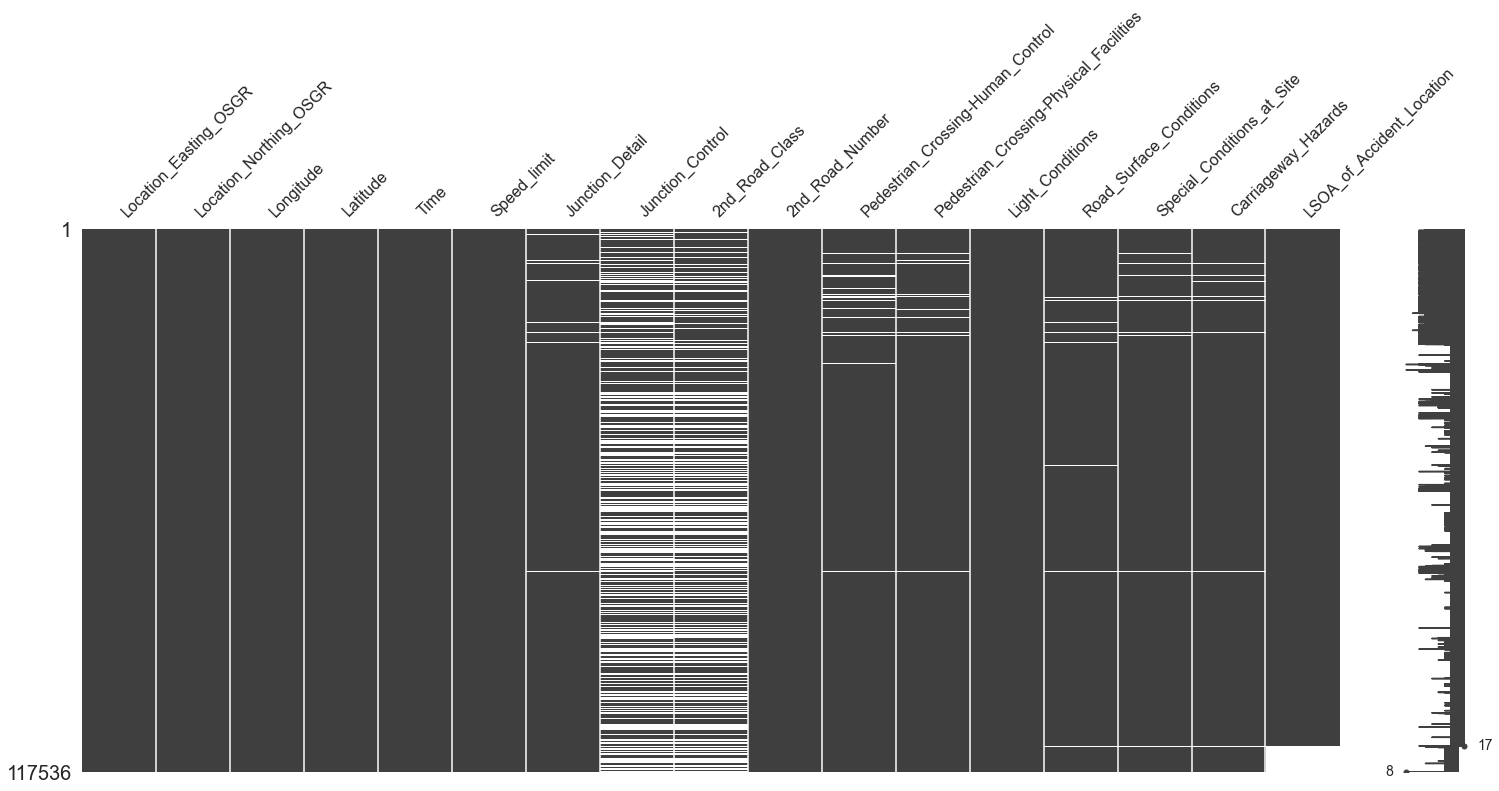

In [851]:
missingdata_df = cleaned_accidents_df.columns[cleaned_accidents_df.isna().any()].tolist()
msno.matrix(cleaned_accidents_df[missingdata_df])

In [1147]:
for names in cleaned_accidents_df.columns:
     
    print("Number of null in "+ names,len(cleaned_accidents_df[cleaned_accidents_df[names].isna()]))
    print("------------------")

Number of null in Accident_Index 0
------------------
Number of null in Location_Easting_OSGR 28
------------------
Number of null in Location_Northing_OSGR 28
------------------
Number of null in Longitude 28
------------------
Number of null in Latitude 28
------------------
Number of null in Police_Force 0
------------------
Number of null in Accident_Severity 0
------------------
Number of null in Number_of_Vehicles 0
------------------
Number of null in Number_of_Casualties 0
------------------
Number of null in Date 0
------------------
Number of null in Day_of_Week 0
------------------
Number of null in Time 63
------------------
Number of null in Local_Authority_(District) 0
------------------
Number of null in Local_Authority_(Highway) 0
------------------
Number of null in 1st_Road_Class 0
------------------
Number of null in 1st_Road_Number 0
------------------
Number of null in Road_Type 0
------------------
Number of null in Speed_limit 80
------------------
Number of null

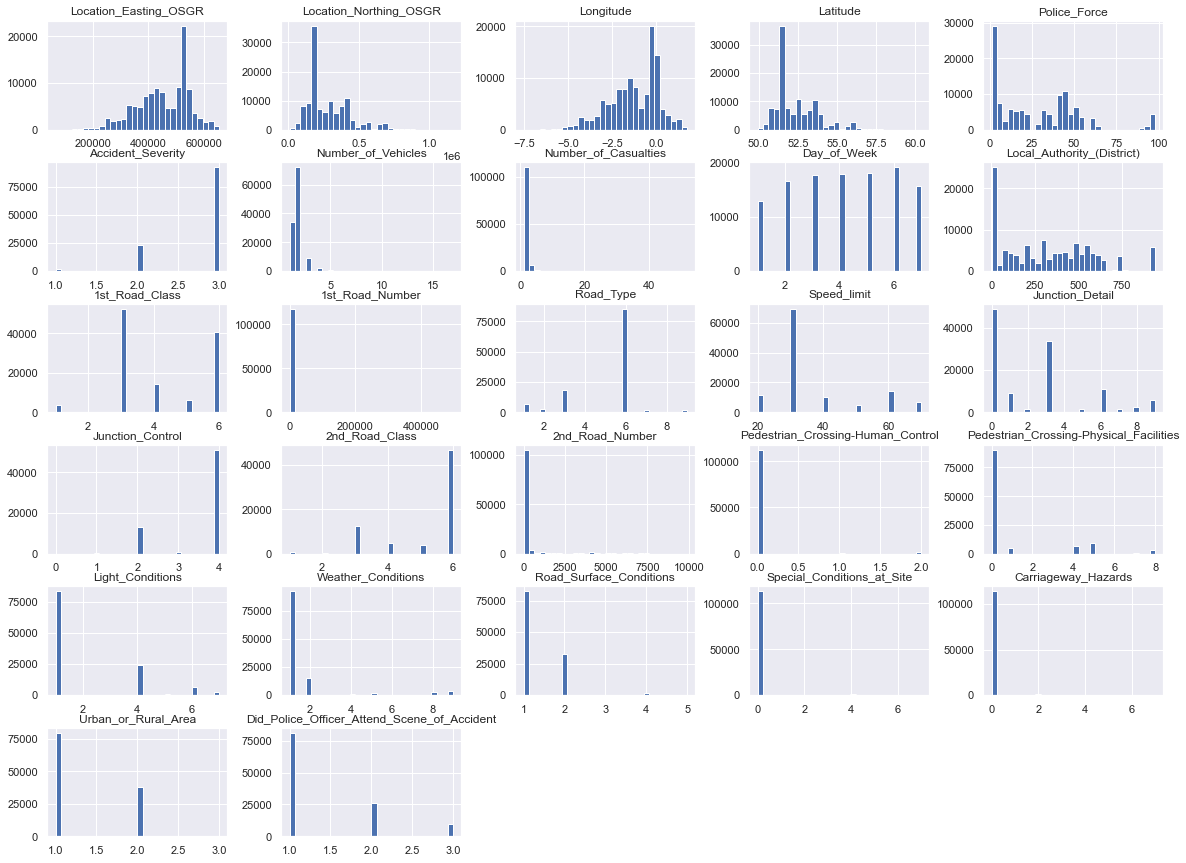

In [1148]:
cleaned_accidents_df.hist(bins=30, figsize=(20,15))
plt.show()

## Cleaning column Wise

### Dropping Location_Easting_OSGR and Location_Northing_OSGR

In [1149]:
#only need Long/Lat as this seems to be duplicated because they contain information about the location of the accident 
#which latitude and longitude also provides.
#And from the images above, they have the same pictorial represenation as the latitute and long
cleaned_accidents_df = cleaned_accidents_df.drop(['Location_Easting_OSGR','Location_Northing_OSGR'], axis = 1) #1 for dropping all columns

In [1150]:
cleaned_accidents_df.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,0.0,5.0,1.0,1,1.0,0.0,0.0,1,3,E01004762
1,2019010152270,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,...,NaN,NaN,4.0,1,1.0,0.0,0.0,1,3,E01003117
2,2019010155191,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01000943
3,2019010155192,-0.191044,51.546387,1,2,1,1,01/01/2019,3,01:20,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01000973
4,2019010155194,-0.200064,51.541121,1,3,2,2,01/01/2019,3,00:40,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01000546


### Cleaning Latitude and Longitude

In [856]:
#They both contains 28 records having null

In [1151]:
cleaned_accidents_df[cleaned_accidents_df['Longitude'].isnull()]

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27337,2019040854828,NaN,NaN,4,3,2,1,21/06/2019,6,20:15,...,0.0,0.0,1.0,1,1.0,0.0,0.0,3,2,NaN
29369,2019051910615,NaN,NaN,5,3,1,1,04/03/2019,2,17:50,...,0.0,0.0,4.0,5,2.0,0.0,0.0,3,1,NaN
30791,2019051912864,NaN,NaN,5,2,2,2,08/11/2019,6,19:18,...,0.0,0.0,6.0,1,2.0,0.0,0.0,3,1,NaN
34816,2019070003662,NaN,NaN,7,3,1,1,04/01/2019,6,15:56,...,0.0,0.0,1.0,9,1.0,0.0,0.0,3,1,NaN
35505,2019070275916,NaN,NaN,7,3,2,1,28/05/2019,3,18:00,...,0.0,0.0,1.0,1,1.0,0.0,0.0,3,2,NaN
36347,2019070700923,NaN,NaN,7,3,2,1,30/11/2019,7,11:35,...,0.0,0.0,1.0,1,1.0,0.0,0.0,3,1,NaN
39798,2019121900341,NaN,NaN,12,2,1,2,24/02/2019,1,15:38,...,0.0,0.0,1.0,1,1.0,0.0,0.0,3,1,NaN
39919,2019121900485,NaN,NaN,12,3,2,3,08/04/2019,2,08:47,...,0.0,0.0,1.0,1,1.0,0.0,0.0,3,1,NaN
39933,2019121900505,NaN,NaN,12,3,2,1,18/03/2019,2,17:57,...,0.0,0.0,4.0,1,2.0,0.0,0.0,3,1,NaN
40179,2019121900771,NaN,NaN,12,3,3,1,02/02/2019,7,10:29,...,0.0,0.0,1.0,3,3.0,0.0,0.0,3,1,NaN


In [1152]:
#Check all accidents that happened on that same day to see if there is a correlation to get the location
cleaned_accidents_df[cleaned_accidents_df["Date"]== '21/06/2019']

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
11022,2019010188583,-0.059715,51.365367,1,3,1,1,21/06/2019,6,00:24,...,0.0,0.0,6.0,1,1.0,0.0,0.0,1,1,E01001062
11025,2019010188593,-0.299921,51.465050,1,2,1,1,21/06/2019,6,00:25,...,0.0,0.0,7.0,1,1.0,0.0,0.0,1,1,E01003860
11026,2019010188594,0.153073,51.495988,1,2,2,1,21/06/2019,6,00:26,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01000466
11027,2019010188595,-0.020815,51.500779,1,2,2,1,21/06/2019,6,01:35,...,0.0,1.0,4.0,1,1.0,0.0,0.0,1,1,E01032772
11028,2019010188596,-0.141320,51.413768,1,3,6,1,21/06/2019,6,01:10,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01003142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116860,201997NA01306,-4.002528,55.861544,97,2,2,1,21/06/2019,6,07:05,...,0.0,5.0,1.0,1,1.0,0.0,0.0,1,1,NaN
117233,201997UC00806,-4.496601,55.621118,97,3,1,1,21/06/2019,6,17:35,...,0.0,0.0,1.0,1,1.0,0.0,0.0,1,1,NaN
117266,201997UC70406,-4.570394,55.405111,97,1,1,1,21/06/2019,6,06:00,...,0.0,0.0,1.0,1,1.0,0.0,0.0,2,1,NaN
117455,2019982104719,-4.269592,55.222971,98,2,1,1,21/06/2019,6,16:30,...,0.0,0.0,1.0,1,1.0,0.0,0.0,2,2,NaN


In [1153]:
cleaned_accidents_df['Longitude'].unique()

array([-0.153842, -0.127949, -0.124193, ..., -3.274645, -2.997491,
       -3.715064])

In [860]:
#Lets replace the missing values with regions that share the same local authority and road type

In [1154]:
def close_region(dataframe,column_name):
    null_ids = dataframe[dataframe[column_name].isna()].index
    
    for index in null_ids:
        frame_count=None
        close_area = dataframe[(dataframe['Local_Authority_(Highway)']== dataframe.iloc[index]['Local_Authority_(Highway)'])
                              & (dataframe['Road_Type']==dataframe.iloc[index]['Road_Type'])
                              & (~dataframe[column_name].isna())]
        total = len(close_area)
        if(total > 0):
            frame_count = close_area.head(1)
            dataframe.at[index,column_name] = frame_count[column_name]

In [1155]:
##Lets replace the missing values with regions that share the same local authority and road type
close_region(cleaned_accidents_df,'Latitude')


In [1156]:
#Replacing the missing values of Longitude with close regions that they share the same authority and Road type
close_region(cleaned_accidents_df,'Longitude')

### Cleaning the Time column

In [1157]:
#This column contains 63 null values
cleaned_accidents_df[cleaned_accidents_df['Time']=='17:00']

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
46,2019010155363,0.018891,51.545345,1,3,2,1,01/01/2019,3,17:00,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,3,E01003551
95,2019010155613,-0.026445,51.481539,1,3,2,1,03/01/2019,5,17:00,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01003253
238,2019010156143,-0.130822,51.425049,1,3,2,1,07/01/2019,2,17:00,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01003114
259,2019010156214,0.160166,51.599628,1,3,2,1,05/01/2019,7,17:00,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01002331
377,2019010156631,-0.285361,51.397564,1,3,1,1,09/01/2019,4,17:00,...,NaN,NaN,4.0,9,1.0,NaN,NaN,1,3,E01002926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117360,2019980867521,-3.628594,55.080299,98,3,2,1,31/07/2019,4,17:00,...,0.0,0.0,1.0,1,2.0,0.0,0.0,1,2,NaN
117361,2019980868648,-3.743983,54.994111,98,3,1,1,12/08/2019,2,17:00,...,0.0,0.0,1.0,1,2.0,0.0,0.0,2,1,NaN
117379,2019980878086,-5.025218,54.903450,98,2,2,1,14/09/2019,7,17:00,...,0.0,0.0,1.0,1,1.0,0.0,0.0,1,1,NaN
117504,2019983116419,-3.513379,55.192388,98,3,3,1,24/06/2019,2,17:00,...,0.0,0.0,1.0,1,2.0,0.0,0.0,2,1,NaN


In [1158]:
#Get the severity of all the null times
Severity_of_null_time = cleaned_accidents_df[(cleaned_accidents_df['Time'].isna())]["Accident_Severity"]

print(Severity_of_null_time)

#Bcos the accident severity is 3 it is safe to use the mode of accidents severity time. which is the time where acc severity is 3 

Severity_of_null_time.value_counts()


#From this, there are 63 records out of which 53 where fatal 9 with Serious and 1 with Slight

578       3
582       3
2326      3
2417      3
2570      3
         ..
44094     3
44177     3
44186     3
44582     3
112149    3
Name: Accident_Severity, Length: 63, dtype: int64


3    53
2     9
1     1
Name: Accident_Severity, dtype: int64

In [1159]:
cleaned_accidents_df['Time'].mode()

0    17:00
dtype: object

In [1160]:
cleaned_accidents_df[cleaned_accidents_df['Time'].isna()]

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
578,2019010157254,-0.071257,51.627336,1,3,2,1,13/01/2019,1,NaN,...,0.0,0.0,7.0,1,2.0,0.0,0.0,1,3,E01001461
582,2019010157270,-0.061140,51.514114,1,3,2,1,10/01/2019,5,NaN,...,NaN,1.0,1.0,8,1.0,0.0,0.0,1,3,E01004304
2326,2019010162544,-0.133571,51.511108,1,3,1,1,10/02/2019,1,NaN,...,0.0,0.0,4.0,5,2.0,0.0,0.0,1,1,E01004763
2417,2019010162834,-0.155733,51.450830,1,3,2,1,10/02/2019,1,NaN,...,NaN,NaN,4.0,5,2.0,NaN,NaN,1,3,E01004479
2570,2019010163302,-0.172958,51.526944,1,3,2,1,14/02/2019,5,NaN,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01004725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44094,2019136B70166,-1.393107,53.710255,13,3,2,1,07/11/2019,5,NaN,...,0.0,0.0,4.0,1,2.0,0.0,0.0,1,1,E01011758
44177,2019136BD1094,-1.568648,53.789497,13,3,2,1,07/11/2019,5,NaN,...,0.0,0.0,1.0,1,2.0,0.0,0.0,1,2,E01011363
44186,2019136BE0937,-1.548155,53.799569,13,3,2,1,14/11/2019,5,NaN,...,0.0,0.0,4.0,2,2.0,0.0,0.0,1,2,E01033008
44582,2019136CI1516,-1.772344,53.834788,13,3,1,1,18/12/2019,4,NaN,...,0.0,0.0,4.0,1,2.0,0.0,0.0,1,1,E01010782


In [1161]:
#mode of Time column
mode_of_time= cleaned_accidents_df['Time'].mode()
mode_of_time

0    17:00
dtype: object

In [1162]:
#Changing all the null values to the mode of Time 17:00
cleaned_accidents_df['Time'].replace(np.nan,'17:00',inplace=True)

### Cleaning Speed Limit Column

In [1163]:
cleaned_accidents_df[cleaned_accidents_df['Speed_limit'].isnull()]

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
397,2019010156691,-0.128083,51.632564,1,3,1,1,04/01/2019,6,14:00,...,0.0,5.0,1.0,1,1.0,0.0,0.0,1,3,E01001519
429,2019010156801,-0.223538,51.491966,1,3,1,1,10/01/2019,5,16:52,...,0.0,0.0,4.0,1,1.0,0.0,0.0,1,1,E01001898
638,2019010157455,-0.320226,51.576552,1,3,2,1,09/01/2019,4,17:20,...,0.0,0.0,4.0,1,NaN,0.0,0.0,1,3,E01000568
946,2019010158408,-0.223883,51.493095,1,3,1,1,19/01/2019,7,18:36,...,2.0,8.0,4.0,1,1.0,0.0,0.0,1,1,E01001898
1028,2019010158618,0.180231,51.569634,1,3,1,1,21/01/2019,2,09:20,...,0.0,1.0,1.0,8,2.0,0.0,0.0,1,1,E01002249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97206,2019471902278,-0.371262,50.818484,47,3,2,1,01/05/2019,4,20:25,...,0.0,0.0,1.0,9,1.0,0.0,0.0,1,2,E01031788
102490,2019521902824,-2.958228,51.340109,52,3,2,1,17/04/2019,4,10:00,...,0.0,0.0,1.0,1,1.0,0.0,0.0,1,2,E01014809
103049,2019521905022,-2.958228,51.340109,52,3,1,1,19/08/2019,2,15:30,...,0.0,0.0,1.0,1,1.0,0.0,0.0,1,2,E01014809
103123,2019521905352,-2.956477,51.297321,52,3,1,1,09/09/2019,2,12:38,...,0.0,0.0,1.0,1,1.0,0.0,0.0,2,2,E01029089


In [871]:
# I am interested in severity of accidents with null as speed-limit
#Then check for the mode of the speed limit 


In [1164]:
null_severity = cleaned_accidents_df.loc[cleaned_accidents_df["Speed_limit"].isna(), ["Accident_Severity","Time"]]
null_severity

,Accident_Severity,Time
397,3,14:00
429,3,16:52
638,3,17:20
946,3,18:36
1028,3,09:20
...,...,...
97206,3,20:25
102490,3,10:00
103049,3,15:30
103123,3,12:38


In [1165]:
null_severity["Accident_Severity"].mode()
null_severity["Time"].mode()

0    15:30
dtype: object

In [1166]:
cleaned_accidents_df['Speed_limit'].value_counts()

30.0    69305
60.0    14514
20.0    11747
40.0    10021
70.0     7153
50.0     4716
Name: Speed_limit, dtype: int64

<AxesSubplot:xlabel='Speed_limit'>

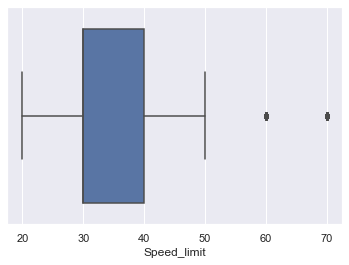

In [1167]:
#fig,ax = plt.subplots(figsize(10,6))
sns.boxplot(cleaned_accidents_df["Speed_limit"])

<AxesSubplot:xlabel='Speed_limit', ylabel='Density'>

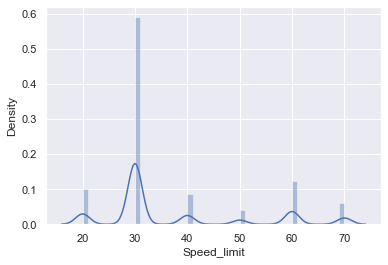

In [1168]:
sns.distplot(cleaned_accidents_df["Speed_limit"])
#Mode is used because the data is having more of frequently occuring 30 as the speed

In [1169]:
#Changing all the null values to the mode of Speed_Limit 30
cleaned_accidents_df['Speed_limit'].replace(np.nan,30.0,inplace=True)

## Cleaning Junction Detail

In [1170]:
cleaned_accidents_df['Junction_Detail'].isnull().sum()
#There are 1397 records with missing values

1397

In [1171]:
cleaned_accidents_df['Junction_Detail'].value_counts()

0.0    48993
3.0    33660
6.0    11221
1.0     9183
9.0     5666
8.0     2722
2.0     1664
5.0     1551
7.0     1479
Name: Junction_Detail, dtype: int64

<AxesSubplot:xlabel='Junction_Detail'>

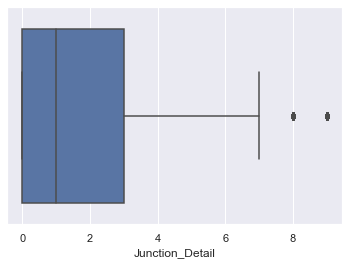

In [1172]:
sns.boxplot(cleaned_accidents_df["Junction_Detail"])

In [1173]:
print(cleaned_accidents_df['Junction_Detail'].mean())
print(cleaned_accidents_df['Junction_Detail'].median())
print(cleaned_accidents_df['Junction_Detail'].mode())

2.3393950352594737
1.0
0    0.0
dtype: float64


In [1174]:
a= cleaned_accidents_df.loc[cleaned_accidents_df["Junction_Detail"].isna(), ["Accident_Severity","Time"]]
a["Accident_Severity"].value_counts()

3    1325
2      72
Name: Accident_Severity, dtype: int64

In [1175]:
b= cleaned_accidents_df.loc[cleaned_accidents_df["Accident_Severity"]==3, ["Junction_Detail"]]
b["Junction_Detail"].value_counts()

#So most of the accidents with junction null junction details has severity of 3, hence the mode of the junction detail with 
#severity 3(which is 0.0) was used

0.0    37177
3.0    26585
6.0     9098
1.0     7808
9.0     4419
8.0     2168
2.0     1423
5.0     1291
7.0     1162
Name: Junction_Detail, dtype: int64

In [1176]:
cleaned_accidents_df['Junction_Detail'].replace(np.nan,0,inplace=True)

### Cleaning the Junction Control Column

In [1177]:
cleaned_accidents_df['Junction_Control'].isnull().sum()

52376

In [1178]:
print(cleaned_accidents_df['Junction_Control'].mean())
print(cleaned_accidents_df['Junction_Control'].median())
print(cleaned_accidents_df['Junction_Control'].mode())

3.56767955801105
4.0
0    4.0
dtype: float64


In [1179]:
def null_value(dataframe,column_name):
    return dataframe[column_name].isnull().sum()

def value_count(dataframe,columnname):
    return dataframe[columnname].value_counts()


def boxplot(dataframe,column_name):
    return sns.boxplot(dataframe[column_name])

def displot(dataframe,column_name):
    return sns.distplot(dataframe[column_name])

def replace(dataframe,column_name,old_value,new_value,inplace):
    return dataframe[column_name].replace(np.nan,new_value,inplace)

def stat(dataframe,column_name):
    mode = dataframe[column_name].mode()
    mean= dataframe[column_name].mean()
    median = dataframe[column_name].median()
    return mode,mean,median
# sns.distplot(cleaned_accidents_df["Speed_limit"])

def drop_column(dataframe,column_name):
    dataframe.drop([column_name], axis = 1,inplace=True)

In [1180]:
value_count(cleaned_accidents_df,"Junction_Control")

4.0    50882
2.0    13122
3.0      773
1.0      379
0.0        4
Name: Junction_Control, dtype: int64

<AxesSubplot:xlabel='Junction_Control', ylabel='Density'>

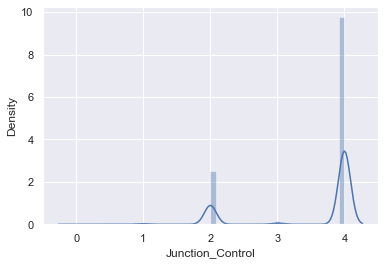

In [1181]:
displot(cleaned_accidents_df,"Junction_Control")

#The mode will be used because we have more occurence of the 4.0 as the junction control and bcos it is skewed to the left

In [1182]:
#cleaned_accidents_df['Junction_Detail'].replace(np.nan,0,inplace=True)
replace(cleaned_accidents_df,'Junction_Control',np.nan,4,True)

In [1183]:
cleaned_accidents_df['Junction_Control'].value_counts()

4.0    103258
2.0     13122
3.0       773
1.0       379
0.0         4
Name: Junction_Control, dtype: int64

### Cleaning 2nd_Road_Class

In [1184]:
#Round the mean to the nearest whole number
print("The mean is ",stat(cleaned_accidents_df,"2nd_Road_Class")[1])
print("The mode is ",stat(cleaned_accidents_df,"2nd_Road_Class")[0])
print("The median is ",stat(cleaned_accidents_df,"2nd_Road_Class")[2])

The mean is  5.214540406254566
The mode is  0    6.0
dtype: float64
The median is  6.0


<AxesSubplot:xlabel='2nd_Road_Class'>

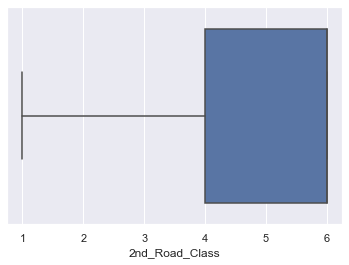

In [1185]:
boxplot(cleaned_accidents_df,"2nd_Road_Class")

<AxesSubplot:xlabel='2nd_Road_Class', ylabel='Density'>

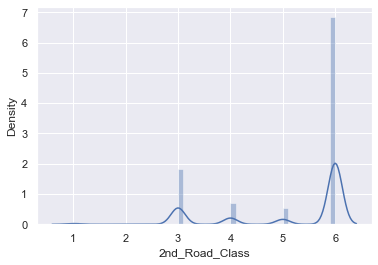

In [1186]:
displot(cleaned_accidents_df,'2nd_Road_Class')

In [1187]:
#The mode will be used to replace the nan values as it appears to be the median as well
replace(cleaned_accidents_df,'2nd_Road_Class',np.nan,6,True)

### Cleaning 2nd road Number

In [1188]:
print("Number of null Values is ",null_value(cleaned_accidents_df,'2nd_Road_Number'))

Number of null Values is  127


In [1189]:
value_count(cleaned_accidents_df,'2nd_Road_Number')

0.0       96812
1.0         254
4.0         217
6.0         213
406.0       174
          ...  
7794.0        1
2734.0        1
1340.0        1
7086.0        1
1394.0        1
Name: 2nd_Road_Number, Length: 3141, dtype: int64

In [1190]:
#Drop this columnn
drop_column(cleaned_accidents_df,'2nd_Road_Number')

### Cleaning Pedestrian Crossing Human Control

In [1191]:
null_value(cleaned_accidents_df,'Pedestrian_Crossing-Human_Control')

3631

In [1192]:
value_count(cleaned_accidents_df,'Pedestrian_Crossing-Human_Control')

0.0    112187
2.0      1241
1.0       477
Name: Pedestrian_Crossing-Human_Control, dtype: int64

<AxesSubplot:xlabel='Pedestrian_Crossing-Human_Control', ylabel='Density'>

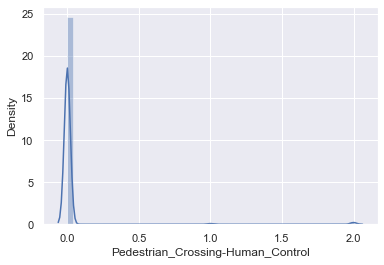

In [1193]:
displot(cleaned_accidents_df,'Pedestrian_Crossing-Human_Control')

In [1194]:
stat(cleaned_accidents_df,'Pedestrian_Crossing-Human_Control')

(0    0.0
 dtype: float64,
 0.025977788507967167,
 0.0)

In [1195]:
## More occurences of 0 hence the mode of the distribution will be used as replacement

replace(cleaned_accidents_df,'Pedestrian_Crossing-Human_Control',np.nan,0,True)

### Cleaning Pedestrian_Crossing-Physical_Facilities

In [1196]:
null_value(cleaned_accidents_df,'Pedestrian_Crossing-Physical_Facilities')

3242

In [1197]:
value_count(cleaned_accidents_df,'Pedestrian_Crossing-Physical_Facilities')

0.0    90131
5.0     9571
4.0     6593
1.0     4766
8.0     2974
7.0      259
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

<AxesSubplot:xlabel='Pedestrian_Crossing-Physical_Facilities', ylabel='Density'>

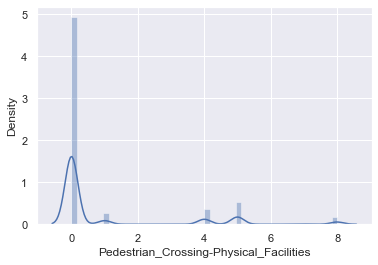

In [1198]:
displot(cleaned_accidents_df,'Pedestrian_Crossing-Physical_Facilities')

In [1199]:
stat(cleaned_accidents_df,'Pedestrian_Crossing-Physical_Facilities')

(0    0.0
 dtype: float64,
 0.9151661504540921,
 0.0)

In [1200]:
#fixing the null vlaues with the mode
replace(cleaned_accidents_df,'Pedestrian_Crossing-Physical_Facilities',np.nan,0,True)

### Cleaning Light_Conditions

In [1201]:
null_value(cleaned_accidents_df,'Light_Conditions')

1

In [1202]:
value_count(cleaned_accidents_df,'Light_Conditions')

1.0    83511
4.0    24407
6.0     6092
7.0     2634
5.0      891
Name: Light_Conditions, dtype: int64

In [1203]:
#Viewing the row with nan value
cleaned_accidents_df[cleaned_accidents_df['Light_Conditions'].isna()]

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
117466,2019983103819,-3.615979,55.068927,98,3,1,1,11/02/2019,2,14:30,...,0.0,0.0,NaN,1,NaN,NaN,NaN,1,2,NaN


In [912]:
#Bcos the time of the accident is 14:30, it is most definitely daylight=1 as it can be seen from other accidents happening 
# around the same time

In [1204]:
cleaned_accidents_df[cleaned_accidents_df['Time']=='14:30']

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
301,2019010156397,0.111559,51.570637,1,3,3,1,08/01/2019,3,14:30,...,0.0,5.0,1.0,1,1.0,0.0,0.0,1,3,E01003773
361,2019010156597,0.118650,51.503971,1,3,2,1,09/01/2019,4,14:30,...,0.0,0.0,1.0,1,1.0,0.0,0.0,1,1,E01001690
433,2019010156810,-0.286054,51.605625,1,3,2,1,10/01/2019,5,14:30,...,0.0,0.0,1.0,1,1.0,0.0,0.0,1,1,E01002120
442,2019010156835,-0.093601,51.430447,1,3,2,1,10/01/2019,5,14:30,...,0.0,0.0,1.0,8,2.0,0.0,0.0,1,3,E01003065
482,2019010156963,-0.324315,51.579182,1,3,2,1,11/01/2019,6,14:30,...,0.0,0.0,1.0,1,1.0,0.0,0.0,1,1,E01000568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116950,201997ND75306,-3.977262,55.821233,97,3,1,2,16/06/2019,1,14:30,...,0.0,8.0,1.0,1,2.0,4.0,0.0,1,1,NaN
117018,201997QA00704,-4.160094,55.766255,97,3,1,1,11/04/2019,5,14:30,...,0.0,0.0,1.0,1,1.0,0.0,0.0,1,2,NaN
117141,201997QD00107,-4.202223,55.818451,97,3,2,1,01/07/2019,2,14:30,...,0.0,4.0,1.0,1,1.0,0.0,0.0,1,1,NaN
117168,201997UA00304,-4.889412,55.832685,97,3,3,5,04/04/2019,5,14:30,...,0.0,0.0,1.0,9,2.0,0.0,0.0,2,1,NaN


<AxesSubplot:xlabel='Light_Conditions'>

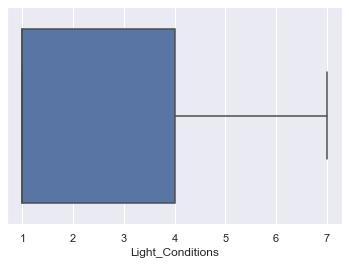

In [1205]:
boxplot(cleaned_accidents_df,'Light_Conditions')

In [1206]:
replace(cleaned_accidents_df,'Light_Conditions',np.nan,1,True)

### Cleaning Road Surface Conditions

In [1207]:
null_value(cleaned_accidents_df,'Road_Surface_Conditions')

1349

In [1208]:
value_count(cleaned_accidents_df,'Road_Surface_Conditions')

1.0    82321
2.0    32259
4.0     1185
3.0      245
5.0      177
Name: Road_Surface_Conditions, dtype: int64

<AxesSubplot:xlabel='Road_Surface_Conditions'>

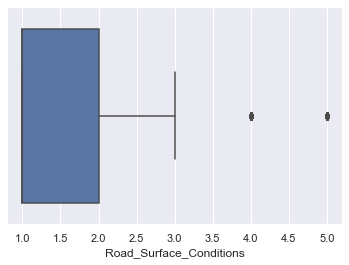

In [1209]:
boxplot(cleaned_accidents_df,'Road_Surface_Conditions')

In [1210]:
stat(cleaned_accidents_df,'Road_Surface_Conditions')

(0    1.0
 dtype: float64,
 1.318555432191209,
 1.0)

In [1211]:
# replace with the mode as it is the same as the median
replace(cleaned_accidents_df,'Road_Surface_Conditions',np.nan,1,True)

### Cleaning Special_Conditions_at_Site

In [1212]:
null_value(cleaned_accidents_df,'Special_Conditions_at_Site')

1819

In [1213]:
value_count(cleaned_accidents_df,'Special_Conditions_at_Site')

0.0    113157
4.0      1328
7.0       295
1.0       276
5.0       240
3.0       200
6.0       183
2.0        38
Name: Special_Conditions_at_Site, dtype: int64

<AxesSubplot:xlabel='Special_Conditions_at_Site', ylabel='Density'>

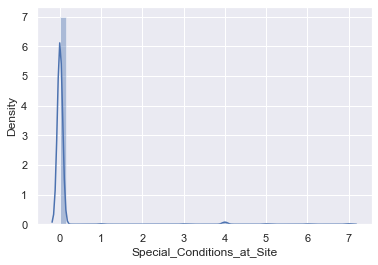

In [1214]:
displot(cleaned_accidents_df,'Special_Conditions_at_Site')

In [924]:
#Replacing missing values with the mode 0.

In [1215]:
replace(cleaned_accidents_df,'Special_Conditions_at_Site',np.nan,0,True)

### Cleaning Carriageway_Hazards

In [1216]:
null_value(cleaned_accidents_df,'Carriageway_Hazards')

1556

In [1217]:
value_count(cleaned_accidents_df,'Carriageway_Hazards')

0.0    113885
2.0      1030
7.0       349
1.0       276
6.0       222
3.0       218
Name: Carriageway_Hazards, dtype: int64

In [1218]:
#Replace with the mode
replace(cleaned_accidents_df,'Carriageway_Hazards',np.nan,0,True)

### Cleaning LSOA_of_Accident_Location

In [1219]:
null_value(cleaned_accidents_df,'LSOA_of_Accident_Location')

5714

In [1220]:
value_count(cleaned_accidents_df,'LSOA_of_Accident_Location')

E01032739    194
E01004736    119
E01033595     93
E01002444     72
E01033708     67
            ... 
E01016266      1
E01010684      1
E01016692      1
E01023448      1
E01027672      1
Name: LSOA_of_Accident_Location, Length: 27762, dtype: int64

In [1221]:
cleaned_accidents_df[cleaned_accidents_df['LSOA_of_Accident_Location'].isna()]

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27337,2019040854828,-2.521965,53.475146,4,3,2,1,21/06/2019,6,20:15,...,0.0,0.0,1.0,1,1.0,0.0,0.0,3,2,NaN
29031,2019050886495,-2.793842,53.425127,5,3,2,1,07/10/2019,2,08:25,...,0.0,0.0,1.0,1,1.0,0.0,0.0,2,2,NaN
29369,2019051910615,-3.111483,53.401389,5,3,1,1,04/03/2019,2,17:50,...,0.0,0.0,4.0,5,2.0,0.0,0.0,3,1,NaN
30791,2019051912864,-2.948562,53.407523,5,2,2,2,08/11/2019,6,19:18,...,0.0,0.0,6.0,1,2.0,0.0,0.0,3,1,NaN
34816,2019070003662,-2.899391,53.277158,7,3,1,1,04/01/2019,6,15:56,...,0.0,0.0,1.0,9,1.0,0.0,0.0,3,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,-3.368899,55.047323,98,3,1,1,18/05/2019,7,01:00,...,0.0,0.0,1.0,1,2.0,0.0,0.0,2,1,NaN
117532,2019984107019,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,...,0.0,0.0,1.0,1,2.0,0.0,0.0,2,1,NaN
117533,2019984107219,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,...,0.0,0.0,1.0,1,1.0,0.0,0.0,2,2,NaN
117534,2019984107419,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,...,0.0,0.0,1.0,1,1.0,0.0,0.0,2,2,NaN


In [1222]:
replace(cleaned_accidents_df,'LSOA_of_Accident_Location',np.nan,'E01032739',True)

In [1223]:
cleaned_accidents_df.isnull().sum()

Accident_Index                                 0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-

## Cleaning of Casualties Data

In [1224]:
cleaned_casualties= casualties_df.copy()

In [1225]:
cleaned_casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

In [1226]:
cleaned_casualties.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [937]:
#Checking for all columns with -1
for names in cleaned_casualties.columns:
    sum = len(cleaned_casualties[cleaned_casualties[names]== -1])
    print("Number of -1 in "+ names,sum)
    percent = round(sum/len(cleaned_casualties)*100,2)
    print("Percent is ",percent)
    print("-------------------")

Number of -1 in Accident_Index 0
Percent is  0.0
-------------------
Number of -1 in Vehicle_Reference 0
Percent is  0.0
-------------------
Number of -1 in Casualty_Reference 0
Percent is  0.0
-------------------
Number of -1 in Casualty_Class 0
Percent is  0.0
-------------------
Number of -1 in Sex_of_Casualty 733
Percent is  0.48
-------------------
Number of -1 in Age_of_Casualty 3255
Percent is  2.13
-------------------
Number of -1 in Age_Band_of_Casualty 3255
Percent is  2.13
-------------------
Number of -1 in Casualty_Severity 0
Percent is  0.0
-------------------
Number of -1 in Pedestrian_Location 1
Percent is  0.0
-------------------
Number of -1 in Pedestrian_Movement 0
Percent is  0.0
-------------------
Number of -1 in Car_Passenger 589
Percent is  0.38
-------------------
Number of -1 in Bus_or_Coach_Passenger 84
Percent is  0.05
-------------------
Number of -1 in Pedestrian_Road_Maintenance_Worker 74
Percent is  0.05
-------------------
Number of -1 in Casualty_Type 

In [1227]:
#Replacing the unknown values by nan
cleaned_casualties.replace(-1,np.nan,inplace=True)

In [1228]:
cleaned_casualties.isnull().sum()

Accident_Index                            0
Vehicle_Reference                         0
Casualty_Reference                        0
Casualty_Class                            0
Sex_of_Casualty                         733
Age_of_Casualty                        3255
Age_Band_of_Casualty                   3255
Casualty_Severity                         0
Pedestrian_Location                       1
Pedestrian_Movement                       0
Car_Passenger                           589
Bus_or_Coach_Passenger                   84
Pedestrian_Road_Maintenance_Worker       74
Casualty_Type                             5
Casualty_Home_Area_Type               17381
Casualty_IMD_Decile                   15372
dtype: int64

## Cleaning Sex_of_Casualty Column

In [1229]:
null_value(cleaned_casualties,'Sex_of_Casualty')

733

In [1230]:
value_count(cleaned_casualties,'Sex_of_Casualty')

1.0    91265
2.0    61160
Name: Sex_of_Casualty, dtype: int64

<AxesSubplot:xlabel='Sex_of_Casualty', ylabel='Density'>

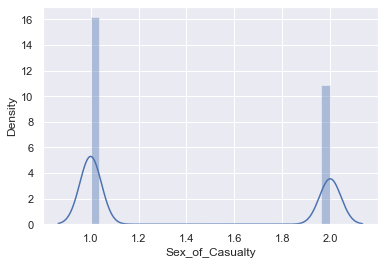

In [1231]:
displot(cleaned_casualties,'Sex_of_Casualty')

In [1232]:
cleaned_casualties['Sex_of_Casualty'].mean()

1.4012465146793505

In [1233]:
cleaned_casualties['Sex_of_Casualty'].median()

1.0

In [1234]:
cleaned_casualties['Sex_of_Casualty'].mode()

0    1.0
dtype: float64

In [1235]:
cleaned_casualties[cleaned_casualties['Sex_of_Casualty'].isna()]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
383,2019010156414,1,2,2,NaN,4.0,1.0,3,0.0,0,2.0,0.0,0.0,9.0,1.0,3.0
1742,2019010159930,1,2,2,NaN,NaN,NaN,3,0.0,0,1.0,0.0,0.0,9.0,1.0,1.0
3745,2019010164961,1,3,2,NaN,NaN,NaN,3,0.0,0,NaN,0.0,0.0,9.0,NaN,NaN
3746,2019010164961,1,4,2,NaN,NaN,NaN,3,0.0,0,NaN,0.0,0.0,9.0,NaN,NaN
3747,2019010164961,1,5,2,NaN,NaN,NaN,3,0.0,0,NaN,0.0,0.0,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147990,2019950000422,2,2,1,NaN,NaN,NaN,3,0.0,0,0.0,0.0,0.0,9.0,NaN,NaN
148048,2019950000472,2,1,1,NaN,NaN,NaN,3,0.0,0,0.0,0.0,0.0,9.0,NaN,NaN
148221,2019950000635,2,2,1,NaN,NaN,NaN,3,0.0,0,0.0,0.0,0.0,19.0,NaN,NaN
148308,2019950000712,1,1,3,NaN,NaN,NaN,3,7.0,9,0.0,0.0,0.0,0.0,NaN,NaN


In [1236]:
replace(cleaned_casualties,'Sex_of_Casualty',np.nan,1,True)

In [1237]:
cleaned_casualties.isnull().sum()

Accident_Index                            0
Vehicle_Reference                         0
Casualty_Reference                        0
Casualty_Class                            0
Sex_of_Casualty                           0
Age_of_Casualty                        3255
Age_Band_of_Casualty                   3255
Casualty_Severity                         0
Pedestrian_Location                       1
Pedestrian_Movement                       0
Car_Passenger                           589
Bus_or_Coach_Passenger                   84
Pedestrian_Road_Maintenance_Worker       74
Casualty_Type                             5
Casualty_Home_Area_Type               17381
Casualty_IMD_Decile                   15372
dtype: int64

## Cleaning Age of Casualty & Age Band column

In [949]:
#To clean age, there is need to consider the age band as well bcos the same set of people with no age has no age band
#Once u fit the age then age band shud be fixed as well
#Bcos I am fixing age with 30 which is the mode, then age band will be 6


In [1238]:
cleaned_casualties[cleaned_casualties['Age_of_Casualty'].isna()]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
1,2019010128300,1,2,2,2.0,NaN,NaN,3,0.0,0,1.0,0.0,0.0,9.0,1.0,5.0
2,2019010128300,1,3,2,2.0,NaN,NaN,3,0.0,0,2.0,0.0,0.0,9.0,1.0,5.0
46,2019010155303,1,2,2,2.0,NaN,NaN,3,0.0,0,2.0,0.0,0.0,9.0,1.0,2.0
47,2019010155303,1,3,2,1.0,NaN,NaN,3,0.0,0,2.0,0.0,0.0,9.0,1.0,2.0
120,2019010155611,1,1,2,2.0,NaN,NaN,3,0.0,0,2.0,0.0,0.0,9.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149202,2019950913735,2,1,1,1.0,NaN,NaN,3,0.0,0,0.0,0.0,0.0,3.0,NaN,NaN
151397,201997GD00306,2,1,1,2.0,NaN,NaN,3,0.0,0,0.0,0.0,0.0,1.0,1.0,8.0
151777,201997GP02001,1,1,1,1.0,NaN,NaN,3,0.0,0,0.0,0.0,0.0,1.0,1.0,9.0
152368,201997ND00304,2,1,1,1.0,NaN,NaN,3,0.0,0,0.0,0.0,0.0,9.0,1.0,3.0


In [1239]:
null_value(cleaned_casualties,'Age_of_Casualty')

3255

In [1240]:
value_count(cleaned_casualties,'Age_of_Casualty')

30.0     3819
18.0     3647
20.0     3620
25.0     3598
19.0     3486
         ... 
97.0       12
98.0        7
99.0        4
101.0       1
102.0       1
Name: Age_of_Casualty, Length: 102, dtype: int64

In [1241]:
stat(cleaned_casualties,'Age_of_Casualty')

(0    30.0
 dtype: float64,
 37.756282395949384,
 34.0)

In [1242]:
cleaned_casualties['Age_of_Casualty'].mode()

0    30.0
dtype: float64

In [1243]:
replace(cleaned_casualties,'Age_of_Casualty',np.nan,30,True)
replace(cleaned_casualties,'Age_Band_of_Casualty',np.nan,6,True)

In [1244]:
cleaned_casualties.isnull().sum()

Accident_Index                            0
Vehicle_Reference                         0
Casualty_Reference                        0
Casualty_Class                            0
Sex_of_Casualty                           0
Age_of_Casualty                           0
Age_Band_of_Casualty                      0
Casualty_Severity                         0
Pedestrian_Location                       1
Pedestrian_Movement                       0
Car_Passenger                           589
Bus_or_Coach_Passenger                   84
Pedestrian_Road_Maintenance_Worker       74
Casualty_Type                             5
Casualty_Home_Area_Type               17381
Casualty_IMD_Decile                   15372
dtype: int64

## Cleaning Pedestrian Location

In [1245]:
cleaned_casualties[cleaned_casualties['Pedestrian_Location'].isna()]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
146604,2019921900298,1,1,3,1.0,0.0,1.0,2,NaN,1,0.0,0.0,0.0,0.0,1.0,10.0


In [1246]:
movement = cleaned_casualties[cleaned_casualties['Pedestrian_Movement']==1]

In [1247]:
movement['Pedestrian_Location'].mode()

#I checked for the most occuring of the pedestrian movement with 1 since our missing value has 1 as the pedestrian movement

0    5.0
dtype: float64

In [1248]:
replace(cleaned_casualties,'Pedestrian_Location',np.nan,5,True)

In [1249]:
cleaned_casualties.isnull().sum()

Accident_Index                            0
Vehicle_Reference                         0
Casualty_Reference                        0
Casualty_Class                            0
Sex_of_Casualty                           0
Age_of_Casualty                           0
Age_Band_of_Casualty                      0
Casualty_Severity                         0
Pedestrian_Location                       0
Pedestrian_Movement                       0
Car_Passenger                           589
Bus_or_Coach_Passenger                   84
Pedestrian_Road_Maintenance_Worker       74
Casualty_Type                             5
Casualty_Home_Area_Type               17381
Casualty_IMD_Decile                   15372
dtype: int64

## Cleaning Car Passenger Column

In [1250]:
cleaned_casualties['Car_Passenger'].unique()

array([ 0.,  1.,  2., nan])

In [1251]:
cleaned_casualties[cleaned_casualties['Car_Passenger'].isna()]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
731,2019010157383,1,2,2,2.0,53.0,8.0,3,0.0,0,NaN,0.0,0.0,9.0,1.0,3.0
743,2019010157412,1,1,2,2.0,53.0,8.0,3,0.0,0,NaN,0.0,0.0,9.0,1.0,2.0
823,2019010157686,1,1,2,2.0,18.0,4.0,3,0.0,0,NaN,0.0,0.0,9.0,1.0,5.0
871,2019010157798,1,2,2,2.0,18.0,4.0,3,0.0,0,NaN,0.0,0.0,9.0,NaN,NaN
1002,2019010158143,1,1,2,2.0,8.0,2.0,3,0.0,0,NaN,0.0,0.0,9.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135807,2019530870486,1,2,2,2.0,30.0,6.0,3,0.0,0,NaN,0.0,0.0,9.0,3.0,7.0
135838,2019530872716,2,2,2,2.0,71.0,10.0,3,0.0,0,NaN,0.0,0.0,9.0,2.0,7.0
135858,2019530874028,1,1,2,2.0,23.0,5.0,3,0.0,0,NaN,0.0,0.0,9.0,2.0,6.0
136165,2019530904474,2,1,2,2.0,30.0,6.0,3,0.0,0,NaN,0.0,0.0,9.0,2.0,6.0


In [1252]:
#find d mode of the age of those with nan as car passenger
car_passenger = cleaned_casualties[cleaned_casualties['Car_Passenger'].isna()]
car_passenger['Age_of_Casualty'].value_counts()

30.0    114
18.0     17
25.0     17
20.0     16
24.0     15
       ... 
80.0      1
51.0      1
87.0      1
69.0      1
70.0      1
Name: Age_of_Casualty, Length: 81, dtype: int64

In [1253]:
those_with_age_30 = cleaned_casualties[cleaned_casualties['Age_of_Casualty']==30]

<AxesSubplot:xlabel='Car_Passenger', ylabel='Density'>

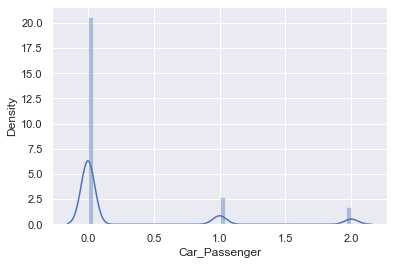

In [1254]:
displot(cleaned_casualties,'Car_Passenger')

In [1255]:
those_with_age_30['Car_Passenger'].mode()

0    0.0
dtype: float64

In [1256]:
cleaned_casualties['Car_Passenger'].value_counts()

0.0    125535
1.0     16825
2.0     10209
Name: Car_Passenger, dtype: int64

In [1257]:
#Replacing with the mode
replace(cleaned_casualties,'Car_Passenger',np.nan,0,True)

In [1258]:
cleaned_casualties.isnull().sum()

Accident_Index                            0
Vehicle_Reference                         0
Casualty_Reference                        0
Casualty_Class                            0
Sex_of_Casualty                           0
Age_of_Casualty                           0
Age_Band_of_Casualty                      0
Casualty_Severity                         0
Pedestrian_Location                       0
Pedestrian_Movement                       0
Car_Passenger                             0
Bus_or_Coach_Passenger                   84
Pedestrian_Road_Maintenance_Worker       74
Casualty_Type                             5
Casualty_Home_Area_Type               17381
Casualty_IMD_Decile                   15372
dtype: int64

### Cleaning Bus_or_Coach_Passenger

In [1259]:
cleaned_casualties['Bus_or_Coach_Passenger'].value_counts()

0.0    150334
4.0      1811
3.0       692
2.0       124
1.0       113
Name: Bus_or_Coach_Passenger, dtype: int64

In [1260]:
replace(cleaned_casualties,'Bus_or_Coach_Passenger',np.nan,0,True)

### Cleaning Pedestrian_Road_Maintenance_Worker

In [1261]:
cleaned_casualties[cleaned_casualties['Pedestrian_Road_Maintenance_Worker'].isna()]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
45884,2019100833015,1,1,3,1.0,30.0,6.0,3,5.0,7,0.0,0.0,NaN,0.0,1.0,9.0
46214,2019100844139,1,1,3,1.0,20.0,4.0,3,1.0,3,0.0,0.0,NaN,0.0,NaN,NaN
46356,2019100849987,1,1,3,1.0,30.0,6.0,3,9.0,7,0.0,0.0,NaN,0.0,1.0,6.0
46501,2019100856038,1,1,3,1.0,74.0,10.0,3,9.0,9,0.0,0.0,NaN,0.0,1.0,1.0
46718,2019100864929,1,1,3,2.0,84.0,11.0,3,1.0,9,0.0,0.0,NaN,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150592,2019970891987,1,1,3,1.0,17.0,4.0,3,4.0,1,0.0,0.0,NaN,0.0,NaN,NaN
150683,2019970894639,1,1,3,1.0,54.0,8.0,3,1.0,3,0.0,0.0,NaN,0.0,1.0,2.0
150727,2019970896805,1,1,3,1.0,11.0,3.0,2,1.0,1,0.0,0.0,NaN,0.0,1.0,1.0
150785,2019970898829,1,1,3,2.0,85.0,11.0,2,5.0,1,0.0,0.0,NaN,0.0,2.0,4.0


In [1262]:
cleaned_casualties['Pedestrian_Road_Maintenance_Worker'].value_counts()

0.0    151736
2.0      1266
1.0        82
Name: Pedestrian_Road_Maintenance_Worker, dtype: int64

In [1263]:
replace(cleaned_casualties,'Pedestrian_Road_Maintenance_Worker',np.nan,0,True)

### Cleaning Casualty Type

In [1264]:
cleaned_casualties['Casualty_Type'].value_counts()

9.0     86634
0.0     21770
1.0     16884
3.0      7542
5.0      5149
19.0     4069
11.0     3085
8.0      2398
4.0      1937
2.0      1317
21.0      533
90.0      510
10.0      299
20.0      253
97.0      223
22.0      205
98.0      130
17.0       92
16.0       63
23.0       56
18.0        4
Name: Casualty_Type, dtype: int64

In [1265]:
cleaned_casualties[cleaned_casualties['Casualty_Type'].isna()]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
3087,2019010163393,2,1,2,1.0,30.0,6.0,3,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
6526,2019010172289,1,1,1,2.0,28.0,6.0,3,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0
6724,2019010172723,2,1,1,1.0,46.0,8.0,3,0.0,0,0.0,0.0,0.0,NaN,1.0,4.0
27417,2019010222730,1,1,1,1.0,20.0,4.0,3,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0
88245,2019350859952,2,1,1,1.0,45.0,7.0,3,0.0,0,0.0,0.0,0.0,NaN,2.0,10.0


In [1266]:
#Replace missing values with the mode
replace(cleaned_casualties,'Casualty_Type',np.nan,9,True)

In [1267]:
cleaned_casualties.isnull().sum()

Accident_Index                            0
Vehicle_Reference                         0
Casualty_Reference                        0
Casualty_Class                            0
Sex_of_Casualty                           0
Age_of_Casualty                           0
Age_Band_of_Casualty                      0
Casualty_Severity                         0
Pedestrian_Location                       0
Pedestrian_Movement                       0
Car_Passenger                             0
Bus_or_Coach_Passenger                    0
Pedestrian_Road_Maintenance_Worker        0
Casualty_Type                             0
Casualty_Home_Area_Type               17381
Casualty_IMD_Decile                   15372
dtype: int64

### cleaning Casualty_Home_Area_Type

In [1268]:
cleaned_casualties[cleaned_casualties['Casualty_Home_Area_Type'].isnull()]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
14,2019010155198,1,3,2,2.0,25.0,5.0,3,0.0,0,2.0,0.0,0.0,9.0,NaN,NaN
16,2019010155198,1,5,2,2.0,28.0,6.0,3,0.0,0,2.0,0.0,0.0,9.0,NaN,NaN
18,2019010155207,1,1,1,1.0,34.0,6.0,3,0.0,0,0.0,0.0,0.0,8.0,NaN,NaN
32,2019010155256,1,1,1,1.0,63.0,9.0,3,0.0,0,0.0,0.0,0.0,9.0,NaN,NaN
37,2019010155276,2,1,1,1.0,65.0,9.0,2,0.0,0,0.0,0.0,0.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153073,2019983102219,1,1,1,2.0,89.0,11.0,3,0.0,0,0.0,0.0,0.0,9.0,NaN,NaN
153092,2019983109819,1,1,1,1.0,30.0,6.0,3,0.0,0,0.0,0.0,0.0,9.0,NaN,10.0
153113,2019983115619,1,1,3,1.0,0.0,1.0,3,9.0,8,0.0,0.0,0.0,0.0,NaN,NaN
153137,2019984105319,1,1,1,1.0,57.0,9.0,1,0.0,0,0.0,0.0,0.0,19.0,NaN,NaN


In [1269]:
cleaned_casualties['Casualty_Home_Area_Type'].value_counts()

1.0    109873
3.0     14391
2.0     11513
Name: Casualty_Home_Area_Type, dtype: int64

In [1270]:
stat(cleaned_casualties,'Casualty_Home_Area_Type')

(0    1.0
 dtype: float64,
 1.296773385772259,
 1.0)

<AxesSubplot:xlabel='Casualty_Home_Area_Type', ylabel='Density'>

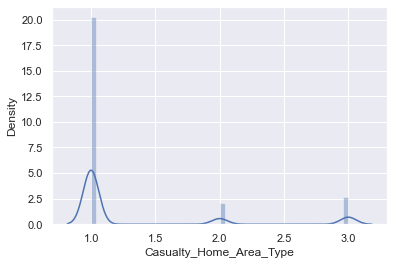

In [1271]:
displot(cleaned_casualties,'Casualty_Home_Area_Type')

In [1272]:
replace(cleaned_casualties,'Casualty_Home_Area_Type',np.nan,1,True)

### Cleaning Casualty_IMD_Decile

In [1273]:
cleaned_casualties['Casualty_IMD_Decile'].value_counts()

2.0     17377
1.0     16415
3.0     16368
4.0     15546
5.0     14190
6.0     13579
7.0     12485
8.0     11549
9.0     10861
10.0     9416
Name: Casualty_IMD_Decile, dtype: int64

In [1274]:
stat(cleaned_casualties,'Casualty_IMD_Decile')

(0    2.0
 dtype: float64,
 4.982922793317173,
 5.0)

<AxesSubplot:xlabel='Casualty_IMD_Decile', ylabel='Density'>

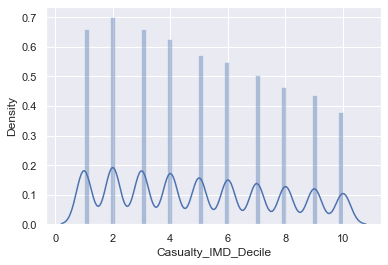

In [1275]:
displot(cleaned_casualties,'Casualty_IMD_Decile')

In [1276]:
replace(cleaned_casualties,'Casualty_IMD_Decile',np.nan,2,True)

In [1277]:
cleaned_casualties.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

### Cleaning Vehicle Data

In [1278]:
#Make a copy of the data
cleaned_vehicle = vehicles_df.copy()

In [1279]:
cleaned_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

In [1280]:
cleaned_vehicle.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [1281]:
#Checking for all columns with -1
for names in cleaned_vehicle.columns:
    sum = len(cleaned_vehicle[cleaned_vehicle[names]== -1])
    print("Number of -1 in "+ names,sum)
    percent = round(sum/len(cleaned_vehicle)*100,2)
    print("Percent is ",percent)
    print("-------------------")

Number of -1 in Accident_Index 0
Percent is  0.0
-------------------
Number of -1 in Vehicle_Reference 0
Percent is  0.0
-------------------
Number of -1 in Vehicle_Type 309
Percent is  0.14
-------------------
Number of -1 in Towing_and_Articulation 4527
Percent is  2.09
-------------------
Number of -1 in Vehicle_Manoeuvre 13063
Percent is  6.04
-------------------
Number of -1 in Vehicle_Location-Restricted_Lane 12746
Percent is  5.89
-------------------
Number of -1 in Junction_Location 9531
Percent is  4.4
-------------------
Number of -1 in Skidding_and_Overturning 13361
Percent is  6.17
-------------------
Number of -1 in Hit_Object_in_Carriageway 13057
Percent is  6.03
-------------------
Number of -1 in Vehicle_Leaving_Carriageway 12916
Percent is  5.97
-------------------
Number of -1 in Hit_Object_off_Carriageway 12271
Percent is  5.67
-------------------
Number of -1 in 1st_Point_of_Impact 6681
Percent is  3.09
-------------------
Number of -1 in Was_Vehicle_Left_Hand_Drive

In [1282]:
### Replacing all missing values by nan
cleaned_vehicle.replace(-1,np.nan,inplace=True)

In [1283]:
cleaned_vehicle.isnull().sum()

Accident_Index                          0
Vehicle_Reference                       0
Vehicle_Type                          309
Towing_and_Articulation              4527
Vehicle_Manoeuvre                   13063
Vehicle_Location-Restricted_Lane    12746
Junction_Location                    9531
Skidding_and_Overturning            13361
Hit_Object_in_Carriageway           13057
Vehicle_Leaving_Carriageway         12916
Hit_Object_off_Carriageway          12271
1st_Point_of_Impact                  6681
Was_Vehicle_Left_Hand_Drive?        11051
Journey_Purpose_of_Driver              58
Sex_of_Driver                           1
Age_of_Driver                       29756
Age_Band_of_Driver                  29756
Engine_Capacity_(CC)                54958
Propulsion_Code                     54447
Age_of_Vehicle                      61755
Driver_IMD_Decile                   42385
Driver_Home_Area_Type               44869
Vehicle_IMD_Decile                  42385
dtype: int64

In [996]:
# #Dropping columns with approximately 20% null values
# columns_to_drop = ['Engine_Capacity_(CC)',
#                    'Propulsion_Code',
#                    'Age_of_Vehicle',
#                    'Driver_IMD_Decile',
#                    'Driver_Home_Area_Type',
#                    'Vehicle_IMD_Decile']
# cleaned_vehicle = cleaned_vehicle.drop(columns_to_drop, axis = 1)

In [1284]:
cleaned_vehicle.isnull().sum()

Accident_Index                          0
Vehicle_Reference                       0
Vehicle_Type                          309
Towing_and_Articulation              4527
Vehicle_Manoeuvre                   13063
Vehicle_Location-Restricted_Lane    12746
Junction_Location                    9531
Skidding_and_Overturning            13361
Hit_Object_in_Carriageway           13057
Vehicle_Leaving_Carriageway         12916
Hit_Object_off_Carriageway          12271
1st_Point_of_Impact                  6681
Was_Vehicle_Left_Hand_Drive?        11051
Journey_Purpose_of_Driver              58
Sex_of_Driver                           1
Age_of_Driver                       29756
Age_Band_of_Driver                  29756
Engine_Capacity_(CC)                54958
Propulsion_Code                     54447
Age_of_Vehicle                      61755
Driver_IMD_Decile                   42385
Driver_Home_Area_Type               44869
Vehicle_IMD_Decile                  42385
dtype: int64

In [1285]:
columns_list = ['Towing_and_Articulation','Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane','Junction_Location',
               'Skidding_and_Overturning',
               'Hit_Object_in_Carriageway',
               'Vehicle_Leaving_Carriageway',
               'Hit_Object_off_Carriageway',
               '1st_Point_of_Impact',
               'Was_Vehicle_Left_Hand_Drive?',
               'Journey_Purpose_of_Driver',
                'Sex_of_Driver',
                'Age_of_Driver',
                'Age_Band_of_Driver',
                'Engine_Capacity_(CC)',
               'Propulsion_Code',
               'Age_of_Vehicle',
               'Driver_IMD_Decile',
               'Driver_Home_Area_Type',
               'Vehicle_IMD_Decile']

### Cleaning Vehicle Type Column

In [1286]:
value_count(cleaned_vehicle,'Vehicle_Type')

9.0     152686
1.0      17437
19.0     12579
3.0       8053
5.0       5228
8.0       4696
11.0      3902
21.0      3357
4.0       2119
2.0       1489
90.0      1005
20.0       982
98.0       890
17.0       423
97.0       415
10.0       405
22.0       250
23.0        65
16.0        65
18.0        26
Name: Vehicle_Type, dtype: int64

In [1287]:
cleaned_vehicle[cleaned_vehicle['Vehicle_Type'].isnull()]

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
756,2019010156782,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2019010157191,2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2621,2019010160009,2,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,2019010160675,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4446,2019010163168,2,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,...,6.0,3.0,28.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192870,2019530842762,1,NaN,NaN,13.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194172,2019541847319,4,NaN,NaN,18.0,0.0,1.0,0.0,0.0,0.0,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194189,2019541918519,3,NaN,NaN,3.0,0.0,2.0,0.0,0.0,0.0,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206626,2019910899151,1,NaN,NaN,5.0,0.0,4.0,0.0,0.0,0.0,...,6.0,2.0,30.0,6.0,NaN,NaN,NaN,5.0,3.0,5.0


In [1288]:
stat(cleaned_vehicle,'Vehicle_Type')

(0    9.0
 dtype: float64,
 9.722041726831797,
 9.0)

In [1289]:
replace(cleaned_vehicle,'Vehicle_Type',np.nan,9,True)

In [1290]:
for col in columns_list:
    mode = cleaned_vehicle[col].mode()
    cleaned_vehicle.replace({col:{np.nan:mode}}, inplace=True)
    #print("mode is ", cleaned_vehicle[col].mode())
    #cleaned_vehicle.replace(np.nan,cleaned_vehicle[col].mode(),inplace=True)

In [1291]:
cleaned_vehicle.isna().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

### Merging all the cleaned Data

In [1292]:
accident_casualties_df = pd.merge(cleaned_accidents_df,cleaned_casualties,how='inner',on = 'Accident_Index')

In [1293]:
len(accident_casualties_df)

153158

# Analysis of the Accident Data

### Getting the months,weekday,hr and days of the week from Date column and Time column


In [1294]:
#Obtaining the months from date column
cleaned_accidents_df['Month']= cleaned_accidents_df['Date'].str[3:5]

In [1295]:
#Obtaining hour fro time
cleaned_accidents_df['Hour'] = cleaned_accidents_df['Time'].str[0:2]

In [1296]:
# Converting day of the week to words from numbers by creating new column
weekday = [2,3,4,5,6]
weekend= [1,7] #Weekend is Sunda and Saturday
cleaned_accidents_df['weekdays'] = cleaned_accidents_df['Day_of_Week'].map(lambda x: 'weekday' if x in weekday else 'weekend')

# A. Hour of the Day with Most Accidents

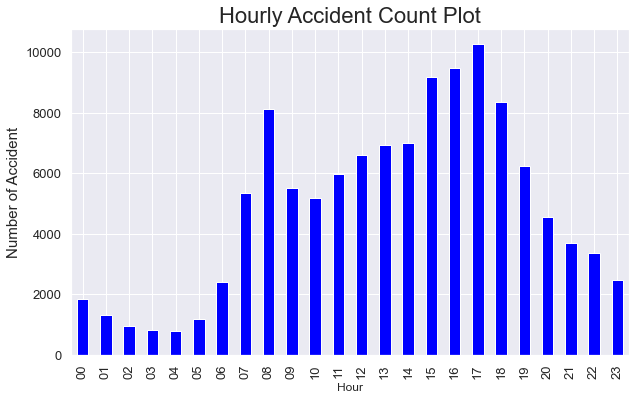

In [1297]:
%matplotlib inline
accidents_by_hour= cleaned_accidents_df['Hour'].groupby(cleaned_accidents_df['Hour']).count()
ax = accidents_by_hour.plot(kind='bar',figsize=(10,6),color='blue',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Hourly Accident Count Plot',fontsize=22)
ax.set_ylabel('Number of Accident',fontsize=15)
plt.show()

## Significant Days of the week with Most accident 

In [1298]:
cleaned_accidents_df['Day_of_Week'].value_counts()

6    19056
5    17973
4    17775
3    17598
2    16643
7    15556
1    12935
Name: Day_of_Week, dtype: int64

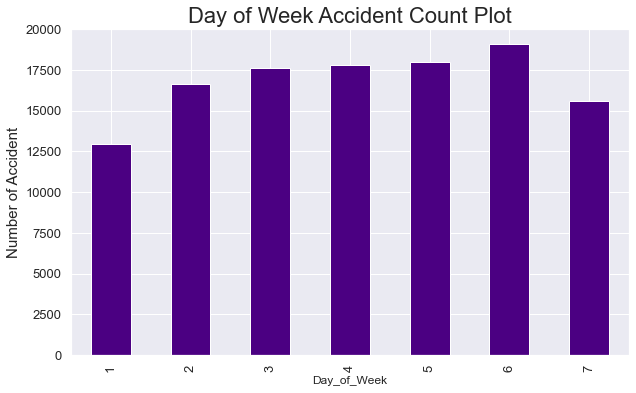

In [1299]:
accidents_by_day_week= cleaned_accidents_df['Day_of_Week'].groupby(cleaned_accidents_df['Day_of_Week']).count()
ax = accidents_by_day_week.plot(kind='bar',figsize=(10,6),color='indigo',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Day of Week Accident Count Plot',fontsize=22)
ax.set_ylabel('Number of Accident',fontsize=15)
plt.show()

## Month of the year with most accident

In [1300]:
accidents_by_months = cleaned_accidents_df['Month'].value_counts()
accidents_by_months

11    10937
07    10325
10    10311
09    10222
12     9972
06     9942
05     9758
08     9534
03     9427
01     9371
04     8899
02     8838
Name: Month, dtype: int64

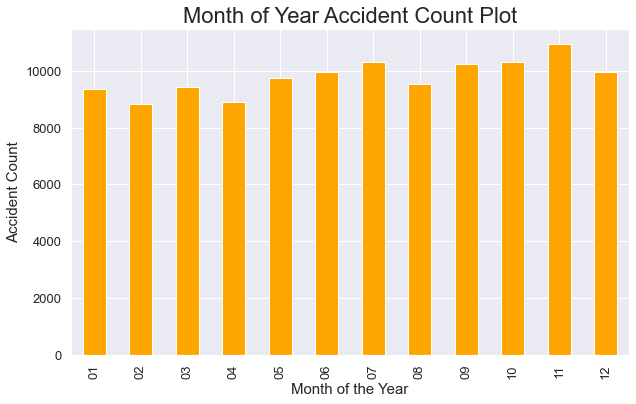

In [1301]:
accidents_by_months= cleaned_accidents_df['Month'].groupby(cleaned_accidents_df['Month']).count()
ax = accidents_by_months.plot(kind='bar',figsize=(10,6),color='orange',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Month of Year Accident Count Plot',fontsize=22)
ax.set_ylabel('Accident Count',fontsize=15)
ax.set_xlabel('Month of the Year',fontsize=15)
plt.show()

## Weekday or Weekend Accident Plot

In [1302]:
accidents_by_day_end = cleaned_accidents_df['weekdays'].value_counts()
accidents_by_day_end

weekday    89045
weekend    28491
Name: weekdays, dtype: int64

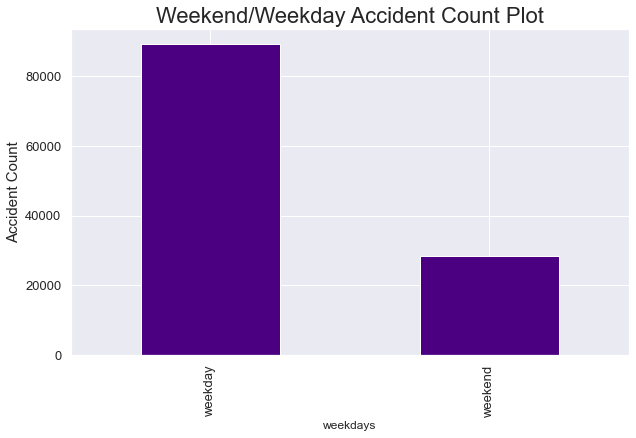

In [1303]:
weekday_count = cleaned_accidents_df['weekdays'].groupby(cleaned_accidents_df['weekdays']).count()

ax = weekday_count.plot(kind='bar',figsize=(10,6),color='indigo',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Weekend/Weekday Accident Count Plot',fontsize=22)
ax.set_ylabel('Accident Count',fontsize=15)
plt.show()

In [1304]:
#Merge the new cleaned accidents to vehicle
accident_vehicle_df = pd.merge(cleaned_accidents_df,cleaned_vehicle,how='inner',on='Accident_Index')

In [1305]:
accident_casualties_df = pd.merge(cleaned_accidents_df,cleaned_casualties,how='inner',on='Accident_Index')

### B. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?

In [1018]:
# Pedestrians are individuals who are walking or running, 
# bicycling, are riding on scooters, skateboards, or skates, 
# or are using a wheelchair, tricycles, or quadricycles
#from the vehicle type this represents labels 1,2,3,4,5,22,23,97

In [1306]:
motorbikes = accident_vehicle_df[accident_vehicle_df['Vehicle_Type'].isin([1,2, 3, 4, 5,22, 23, 97])]

In [1307]:
motorbikes['Hour'].value_counts()

17    3482
18    2981
16    2884
08    2767
15    2543
19    2115
07    2042
13    2036
14    1978
12    1877
11    1669
09    1640
10    1456
20    1382
21    1014
22     809
06     793
23     504
05     309
00     298
01     178
02     119
04     102
03      78
Name: Hour, dtype: int64

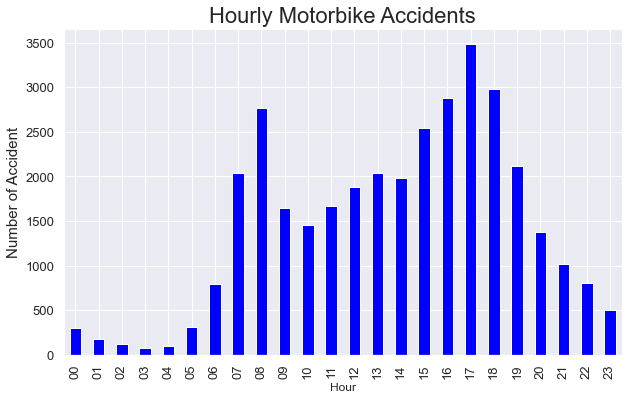

In [1308]:
#Hours of the Day
motorbike_by_hour= motorbikes['Hour'].groupby(motorbikes['Hour']).count()
ax = motorbike_by_hour.plot(kind='bar',figsize=(10,6),color='blue',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Hourly Motorbike Accidents',fontsize=22)
ax.set_ylabel('Number of Accident',fontsize=15)
plt.show()

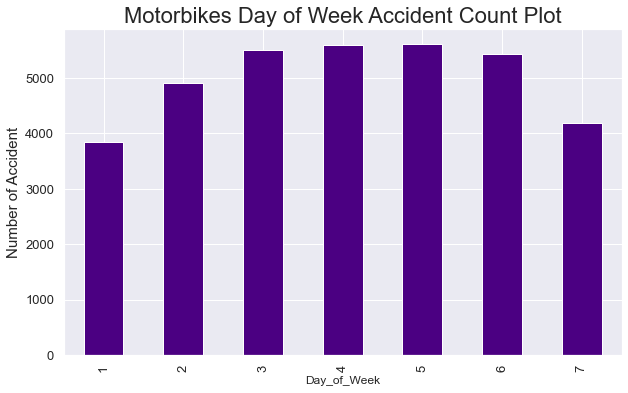

In [1309]:
## days of the week with motorbikes involve in accident
motorbikes_accidents_by_day_week= motorbikes['Day_of_Week'].groupby(motorbikes['Day_of_Week']).count()
ax = motorbikes_accidents_by_day_week.plot(kind='bar',figsize=(10,6),color='indigo',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Motorbikes Day of Week Accident Count Plot',fontsize=22)
ax.set_ylabel('Number of Accident',fontsize=15)
plt.show()

### C.For pedestrians involved in accidents, are there significant hours of the day, and days of the week, 
### on which they are more likely to be involved?

In [1310]:
accident_casualties_df['Casualty_Class'].value_counts()

1    99290
2    32098
3    21770
Name: Casualty_Class, dtype: int64

In [1311]:
pedestrian_accidents = accident_casualties_df[accident_casualties_df['Casualty_Class']==3]

In [1312]:
len(pedestrian_accidents)

21770

In [1313]:
pedestrian_accidents['Hour'].value_counts()

15    2378
16    1879
17    1878
08    1779
18    1588
13    1244
14    1215
12    1174
19    1148
11    1004
09     949
10     937
20     822
07     704
22     629
21     575
23     428
00     345
06     265
01     237
02     172
03     163
05     138
04     119
Name: Hour, dtype: int64

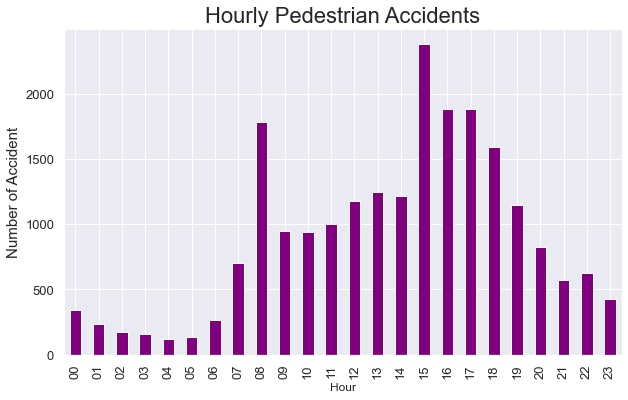

In [1314]:
pedestrian_by_hour= pedestrian_accidents['Hour'].groupby(pedestrian_accidents['Hour']).count()
ax = pedestrian_by_hour.plot(kind='bar',figsize=(10,6),color='purple',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Hourly Pedestrian Accidents',fontsize=22)
ax.set_ylabel('Number of Accident',fontsize=15)
plt.show()

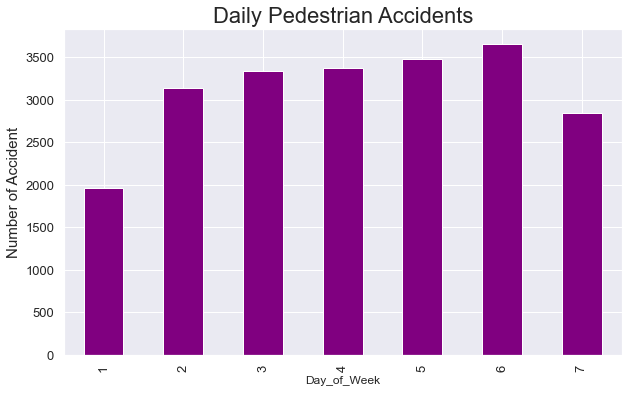

In [1315]:
pedestrian_by_day= pedestrian_accidents['Day_of_Week'].groupby(pedestrian_accidents['Day_of_Week']).count()
ax = pedestrian_by_day.plot(kind='bar',figsize=(10,6),color='purple',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Daily Pedestrian Accidents',fontsize=22)
ax.set_ylabel('Number of Accident',fontsize=15)
plt.show()

### (d)	What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?

In [1316]:
cleaned_accidents_df['Date']

0         18/02/2019
1         15/01/2019
2         01/01/2019
3         01/01/2019
4         01/01/2019
             ...    
117531    18/05/2019
117532    30/05/2019
117533    21/06/2019
117534    29/06/2019
117535    21/04/2019
Name: Date, Length: 117536, dtype: object

In [1030]:
#First is to get equivalent day of year from the date column

In [1317]:
for index in cleaned_accidents_df['Date'].index:
    extracted_date = cleaned_accidents_df.at[index, 'Date']
    list_of_dates = re.split('/',extracted_date)
    list_date = [int(date) for date in list_of_dates]
    day_of_year = datetime.date(list_date[2],list_date[1],list_date[0]).timetuple().tm_yday
    cleaned_accidents_df.at[index, 'day_of_year'] = int(day_of_year)

In [1318]:
cleaned_accidents_df['day_of_year']

0          49.0
1          15.0
2           1.0
3           1.0
4           1.0
          ...  
117531    138.0
117532    150.0
117533    172.0
117534    180.0
117535    111.0
Name: day_of_year, Length: 117536, dtype: float64

In [1319]:
# daylight started Sunday, March 31, 2019 which is day 90 of the year
# daylight ended Sunday, 27 October,2019 which is day 300 of the year
# The week after it starts means days between 90 and 96(inclusive)
# The week after is stops means days between 300 and 306

# However to get the imapct we must no what the accident rate was b4 daylight started and before end of daylight
# The week before it starts is days between 83 and 89
# The week b4 it ends is 293 and 299

In [1320]:
week_before_daylight_starts = 0
week_after_daylight = 0 
week_before_end = 0
week_after_end = 0
for index in cleaned_accidents_df['day_of_year'].index:
    day_of_year = cleaned_accidents_df.at[index,'day_of_year']

    if (day_of_year >= 83) and (day_of_year <=89):
        week_before_daylight_starts = week_before_daylight_starts + 1
    elif (day_of_year >=90) and (day_of_year <=96):
        week_after_daylight = week_after_daylight + 1
    elif (day_of_year >= 293) and (day_of_year <=299):
        week_before_end = week_before_end + 1
    elif (day_of_year >= 300) and (day_of_year <=306):
        week_after_end = week_after_end + 1
    else:
        pass

In [1321]:
print("Number of Accidents a week before start of daylight is: ", week_before_daylight_starts )
print('======================================================')
print("Number of Accidents a week after daylight savings is: ", week_after_daylight )
print('======================================================')
print("Number of Accidents a week before end of daylight savings: ", week_before_end )
print('======================================================')
print("Number of Accidents a week after end of daylight savings: ", week_after_end)
print('======================================================')

Number of Accidents a week before start of daylight is:  2331
Number of Accidents a week after daylight savings is:  2171
Number of Accidents a week before end of daylight savings:  2158
Number of Accidents a week after end of daylight savings:  2335


In [1036]:
#From results above it shows that there was an increase in number of accident 

### (e)	What impact, if any, does sunrise and sunset times have on road traffic accidents?

In [1037]:
#On the assumption that sunrise starts by 6am and sunset by 19pm
# https://www.suntoday.org/sunrise-sunset/tomorrow.html

In [1322]:
cleaned_accidents_df['Hour'] = pd.to_numeric(cleaned_accidents_df['Hour'],errors='coerce').astype('Int64')
#df.ID = pd.to_numeric(df.ID, errors='coerce').astype('Int64')

In [1323]:
sunrise_count = 0
sunset_count = 0
for index in cleaned_accidents_df['Hour'].index:
    hour_of_day = cleaned_accidents_df.at[index,'Hour']
    if (hour_of_day >= 6) and (hour_of_day <= 18):
        sunrise_count = sunrise_count +1
    else:
        sunset_count = sunset_count + 1

In [1324]:
print("The Number of accidents for Sunrise time is ",sunrise_count)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("The number of accidents for Sunset time is ",sunset_count)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++")

The Number of accidents for Sunrise time is  90314
+++++++++++++++++++++++++++++++++++++++++++++++++++++
The number of accidents for Sunset time is  27222
+++++++++++++++++++++++++++++++++++++++++++++++++++++


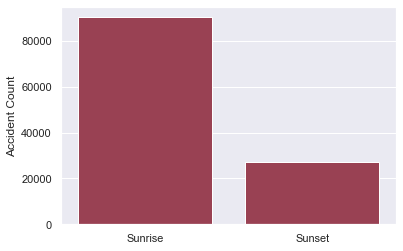

In [1325]:
x = ['Sunrise','Sunset']
counts = [sunrise_count,sunset_count]
sns.barplot(x=x,y = counts,color='#a8324a')
plt.ylabel('Accident Count')
plt.show()

### (f)	Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?

In [1326]:
accident_vehicle_df['Vehicle_Type'].value_counts()

9.0     152995
1.0      17437
19.0     12579
3.0       8053
5.0       5228
8.0       4696
11.0      3902
21.0      3357
4.0       2119
2.0       1489
90.0      1005
20.0       982
98.0       890
17.0       423
97.0       415
10.0       405
22.0       250
23.0        65
16.0        65
18.0        26
Name: Vehicle_Type, dtype: int64

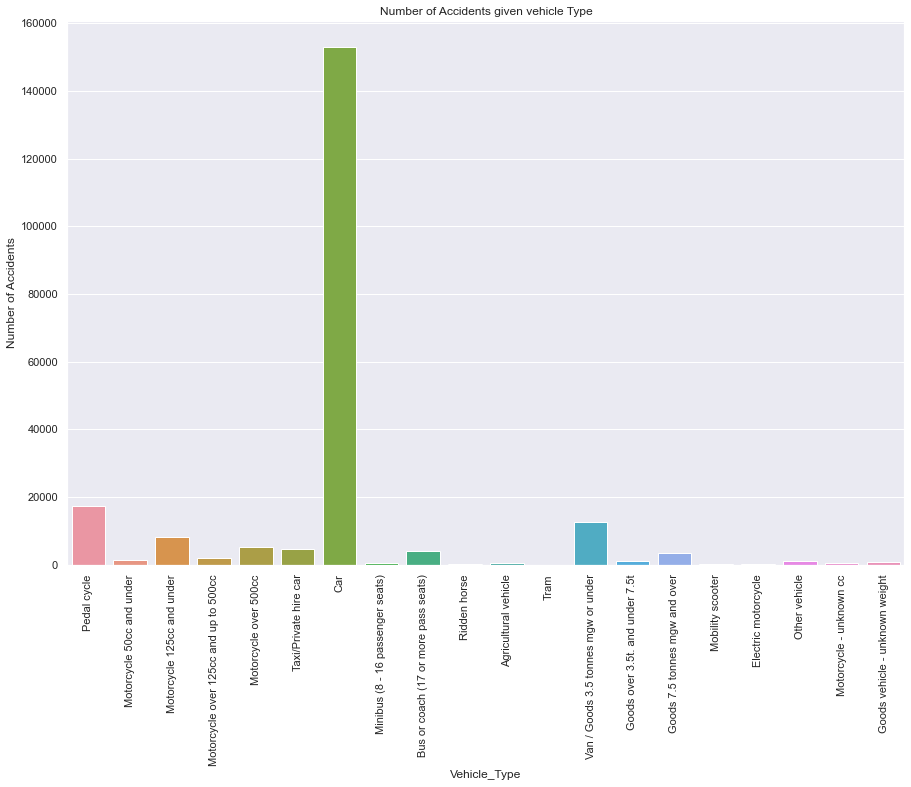

In [1327]:
labels = ['Pedal cycle','Motorcycle 50cc and under',
          'Motorcycle 125cc and under',
          'Motorcycle over 125cc and up to 500cc',
          'Motorcycle over 500cc',
         'Taxi/Private hire car',
         'Car','Minibus (8 - 16 passenger seats)',
         'Bus or coach (17 or more pass seats)','Ridden horse','Agricultural vehicle','Tram',
         'Van / Goods 3.5 tonnes mgw or under',
         'Goods over 3.5t. and under 7.5t',
         'Goods 7.5 tonnes mgw and over',
         'Mobility scooter','Electric motorcycle',
         'Other vehicle',
         'Motorcycle - unknown cc',
         'Goods vehicle - unknown weight']


plt.figure(figsize=(15,10))
ax= sns.countplot(data=accident_vehicle_df,x="Vehicle_Type")
ax.set_xticklabels(labels=labels,rotation=90)

plt.ylabel("Number of Accidents")
plt.title('Number of Accidents given vehicle Type')
plt.show()

In [1328]:
import plotly
import plotly.graph_objs as go

In [1329]:
# vehicles_by_Vehicle_Type:  

vehicles_by_vehicle_type = accident_vehicle_df.Vehicle_Type.groupby([accident_vehicle_df.Vehicle_Type]).count().sort_values()
vehicles_by_vehicle_type
# plt.figure(figsize=(15,10))
# ax= sns.countplot(data=vehicles_by_age_of_vehicle,x="Vehicle_Type")
# ax.set_xticklabels(rotation=90)

# plt.ylabel("Number of Accidents")
# plt.title('Number of Accidents given vehicle Type')
# plt.show()

Vehicle_Type
18.0        26
16.0        65
23.0        65
22.0       250
10.0       405
97.0       415
17.0       423
98.0       890
20.0       982
90.0      1005
2.0       1489
4.0       2119
21.0      3357
11.0      3902
8.0       4696
5.0       5228
3.0       8053
19.0     12579
1.0      17437
9.0     152995
Name: Vehicle_Type, dtype: int64

In [1330]:
accident_vehicle_df['Age_of_Vehicle'].value_counts()

3.0     74111
1.0     12103
4.0     11992
2.0     11907
5.0     10630
        ...  
72.0        1
90.0        1
63.0        1
74.0        1
62.0        1
Name: Age_of_Vehicle, Length: 74, dtype: int64

### Engine capacity of Vehicles

In [1047]:
# accident_vehicle_df['Engine_Capacity_(CC)'].unique()

In [1048]:
import plotly.express as px


In [1049]:
# fig = px.density_mapbox(cleaned_accidents_df, lat='Latitude', lon='Longitude', radius=10,
#                         center=dict(lat=0, lon=180), zoom=0,
#                         mapbox_style="stamen-terrain")
# fig.show()

In [1050]:
# # vehicles_by_Age_of_Vehicle:  

# vehicles_by_age_of_vehicle= accident_vehicle_df.Age_of_Vehicle.groupby([accident_vehicle_df.Age_of_Vehicle]).count().sort_values()



### (g)	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

In [1051]:
#Effects of various environment factor on severity of accidents

#Accident Vs Weather conditions

### Effect of Weather Conditions

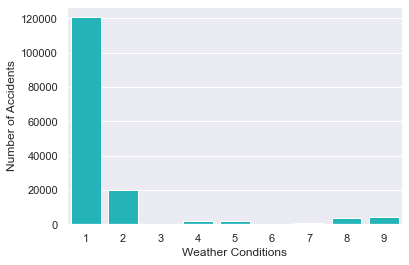

In [1331]:
sns.countplot(data=accident_casualties_df, x='Weather_Conditions', color='#0bcad0')
plt.xlabel("Weather Conditions")
plt.ylabel('Number of Accidents')
plt.show()

### Effect of Light Conditions

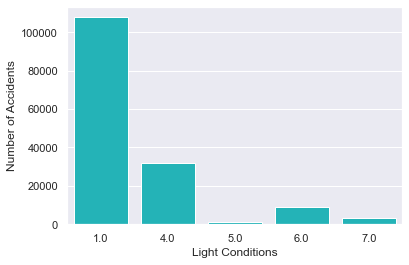

In [1332]:
sns.countplot(data=accident_casualties_df, x='Light_Conditions', color='#0bcad0')
plt.xlabel("Light Conditions")
plt.ylabel('Number of Accidents')
plt.show()

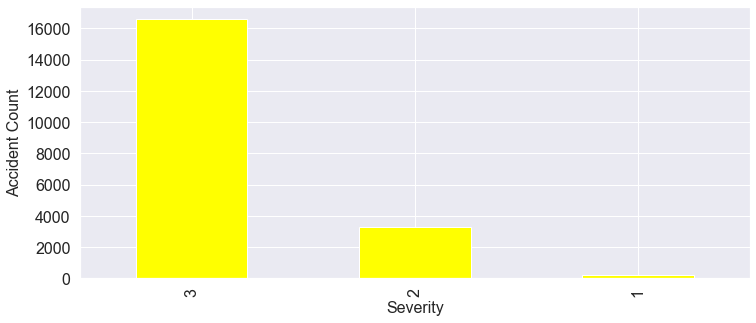

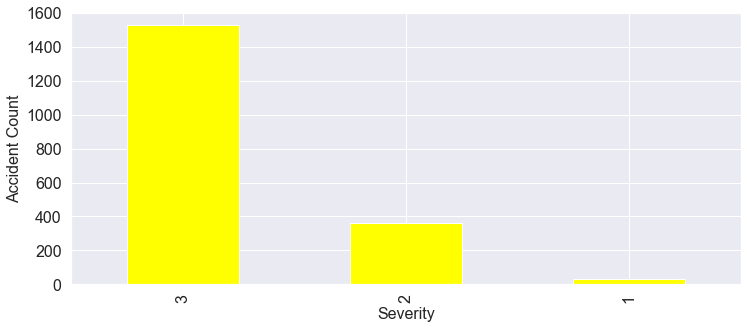

In [1333]:
# Accident count under Fine no high winds
# Raining no high winds
# Snowing no high winds
# Fine + high winds
# Raining + high winds
# Snowing + high winds
# Fog or mist
# Other
# Unknown
labels = [2,5]
for s in labels:
    plt.subplots(1,1,figsize=(12,5))
    #plt.suptitle("Accident Severity under " + s,fontsize=16)
    plt.subplot(1,1,1)
    accident_casualties_df.loc[accident_casualties_df['Weather_Conditions']==s]['Casualty_Severity'].value_counts().plot.bar(width=0.5,color='yellow')
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,1,1)


In [1334]:
accident_casualties_df.loc[accident_casualties_df['Weather_Conditions']==5]['Casualty_Severity'].value_counts()

3    1525
2     359
1      34
Name: Casualty_Severity, dtype: int64

<AxesSubplot:xlabel='Severity', ylabel='Accident Count'>

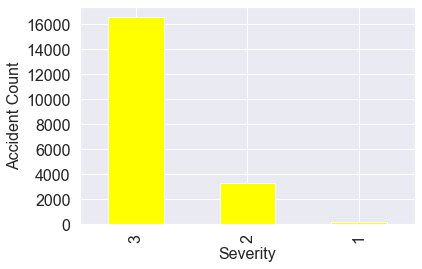

In [1335]:
accident_casualties_df.loc[accident_casualties_df['Weather_Conditions']==2]['Casualty_Severity'].value_counts().plot.bar(width=0.5,color='yellow')
plt.xlabel('Severity',fontsize=16)
plt.ylabel('Accident Count',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.subplot(1,1,1)

<AxesSubplot:xlabel='Severity', ylabel='Accident Count'>

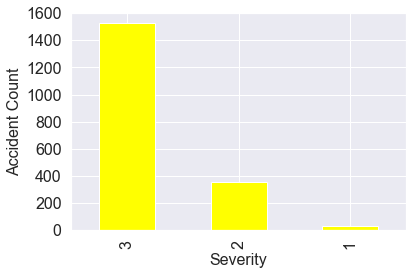

In [1336]:
accident_casualties_df.loc[accident_casualties_df['Weather_Conditions']==5]['Casualty_Severity'].value_counts().plot.bar(width=0.5,color='yellow')
plt.xlabel('Severity',fontsize=16)
plt.ylabel('Accident Count',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.subplot(1,1,1)

<AxesSubplot:xlabel='Severity', ylabel='Accident Count'>

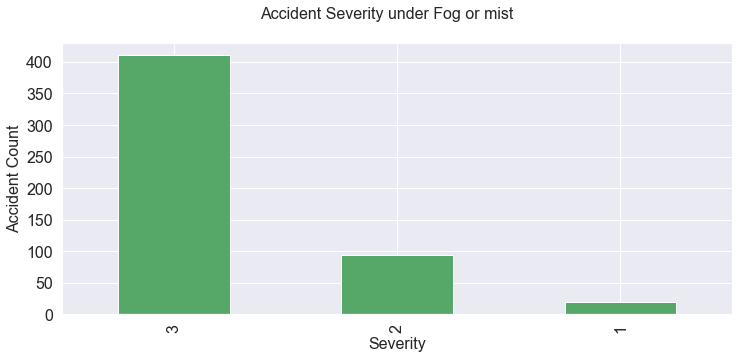

In [1337]:
plt.subplots(1,1,figsize=(12,5))
plt.suptitle("Accident Severity under Fog or mist",fontsize=16)
plt.subplot(1,1,1)
accident_casualties_df.loc[accident_casualties_df['Weather_Conditions']==7]['Casualty_Severity'].value_counts().plot.bar(width=0.5,color='g')
plt.xlabel('Severity',fontsize=16)
plt.ylabel('Accident Count',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.subplot(1,1,1)

In [1059]:
# import geopandas as gpd
# from geopandas import GeoDataFrame

In [1338]:
age_band= cleaned_vehicle['Age_Band_of_Driver'].value_counts()

In [1339]:
age_band_lookup=pd.read_excel('Data/variable lookup.xls',sheet_name='Age Band')

In [1340]:
merged_age_band=pd.merge(age_band,age_band_lookup,left_index=True,right_on='code')

In [1341]:
merged_age_band

,Age_Band_of_Driver,code,label
5,75749,6,26 - 35
6,35341,7,36 - 45
7,32281,8,46 - 55
4,20568,5,21 - 25
8,20344,9,56 - 65
3,13947,4,16 - 20
9,9848,10,66 - 75
10,6169,11,Over 75
2,1727,3,11 - 15
1,364,2,6 - 10


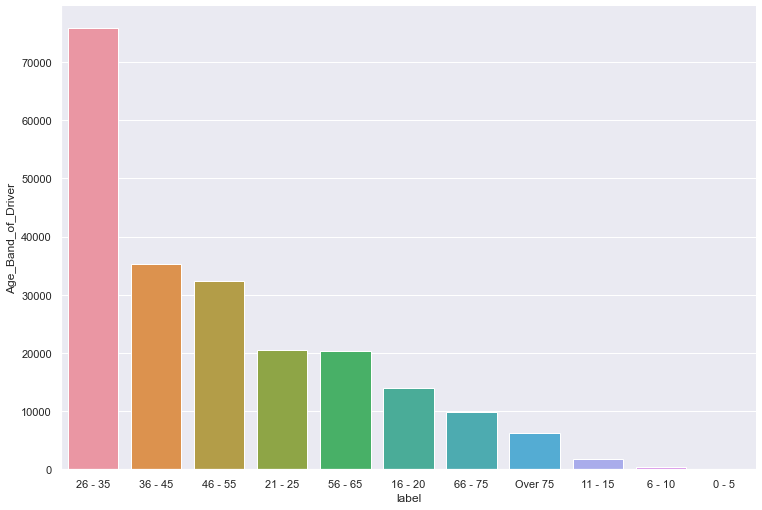

In [1342]:
sns.catplot(data=merged_age_band, x="label", y='Age_Band_of_Driver', kind='bar', height=7, aspect=1.5)

### (h)	How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

In [1343]:
#Age of Driver
accident_vehicle_df['Age_Band_of_Driver'].value_counts()

6.0     75749
7.0     35341
8.0     32281
5.0     20568
9.0     20344
4.0     13947
10.0     9848
11.0     6169
3.0      1727
2.0       364
1.0        43
Name: Age_Band_of_Driver, dtype: int64

### Age band of Driver

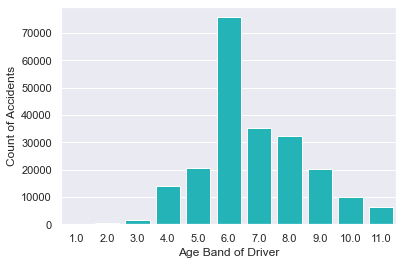

In [1344]:
sns.countplot(data=accident_vehicle_df, x='Age_Band_of_Driver', color='#0bcad0')
plt.xlabel("Age Band of Driver")
plt.ylabel('Count of Accidents')
plt.show()

### Sex of Driver

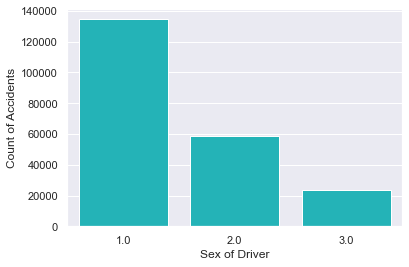

In [1345]:
sns.countplot(data=accident_vehicle_df, x='Sex_of_Driver', color='#0bcad0')
plt.xlabel("Sex of Driver")
plt.ylabel('Count of Accidents')
plt.show()

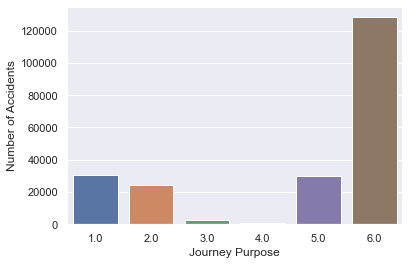

In [1346]:
sns.countplot(data=accident_vehicle_df,x='Journey_Purpose_of_Driver')
plt.xlabel('Journey Purpose')
plt.ylabel('Number of Accidents')
plt.show()

## Building Predictive Model:

In [1347]:
features_raw  = accident_vehicle_df[['Day_of_Week','Age_Band_of_Driver','Weather_Conditions',
                                    'Accident_Severity','1st_Road_Class','Road_Surface_Conditions',
                                    'Sex_of_Driver','Vehicle_Manoeuvre','Speed_limit']]

In [1348]:
features_raw

,Day_of_Week,Age_Band_of_Driver,Weather_Conditions,Accident_Severity,1st_Road_Class,Road_Surface_Conditions,Sex_of_Driver,Vehicle_Manoeuvre,Speed_limit
0,2,9.0,1,3,3,1.0,1.0,18.0,30.0
1,2,6.0,1,3,3,1.0,3.0,18.0,30.0
2,3,5.0,1,3,3,1.0,2.0,18.0,30.0
3,3,6.0,1,3,3,1.0,3.0,18.0,30.0
4,3,7.0,1,3,4,1.0,1.0,3.0,30.0
...,...,...,...,...,...,...,...,...,...
216376,5,4.0,1,3,3,2.0,1.0,18.0,60.0
216377,6,6.0,1,3,4,1.0,1.0,18.0,60.0
216378,6,9.0,1,3,4,1.0,1.0,18.0,60.0
216379,7,11.0,1,3,6,1.0,1.0,7.0,30.0


In [1349]:
# identify categorical feature to get dummay variables(one-hot encoding dataframes):
col_severity = pd.get_dummies(features_raw['Accident_Severity'], prefix='Severity')
col_speed_limit = pd.get_dummies(features_raw['Speed_limit'], prefix='SpeedLimit')
col_weather = pd.get_dummies(features_raw['Weather_Conditions'], prefix='Weather')
col_road_surface = pd.get_dummies(features_raw['Road_Surface_Conditions'], prefix='road_surface')
col_sex_of_driver = pd.get_dummies(features_raw['Sex_of_Driver'], prefix='sex_of_driver')
col_vehicle_manuover = pd.get_dummies(features_raw['Vehicle_Manoeuvre'], prefix='vehicle_manuover')
col_first_road_class = pd.get_dummies(features_raw['1st_Road_Class'], prefix='first_road_class')
col_driver_age_band = pd.get_dummies(features_raw['Age_Band_of_Driver'], prefix='driver_age_band')
col_day_of_week = pd.get_dummies(features_raw['Day_of_Week'], prefix='day_of_week')

In [1350]:
features_raw = pd.concat([col_severity, col_speed_limit, col_weather, col_road_surface, col_sex_of_driver, col_vehicle_manuover,
                   col_first_road_class, col_driver_age_band, col_day_of_week], axis=1)

In [1351]:
encoded = list(features_raw.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

68 total features after one-hot encoding.


In [1352]:
rule_conditions= apriori(features_raw,min_support=0.4,use_colnames=True)

In [1353]:
rules_df = association_rules(rule_conditions, metric='confidence', min_threshold=0.5)
rules_df["antecedent_len"] = rules_df["antecedents"].apply(lambda x: len(x))
rules_df["consequents_len"] = rules_df["consequents"].apply(lambda x: len(x))
rules_df.sort_values(by=['conviction'], ascending=False, inplace=True)
rules_df[rules_df['consequents']=={'Severity_3'}][0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,(SpeedLimit_30.0),(Severity_3),0.577981,0.798471,0.472967,0.818309,1.024845,0.011466,1.109184,1,1
5,(road_surface_1.0),(Severity_3),0.717489,0.798471,0.574838,0.801180,1.003392,0.001944,1.013624,1,1
23,"(Weather_1, road_surface_1.0)",(Severity_3),0.671672,0.798471,0.535620,0.797443,0.998713,-0.000690,0.994925,2,1
9,(vehicle_manuover_18.0),(Severity_3),0.532159,0.798471,0.423221,0.795291,0.996018,-0.001692,0.984466,1,1
2,(Weather_1),(Severity_3),0.791983,0.798471,0.628734,0.793873,0.994241,-0.003642,0.977692,1,1
7,(sex_of_driver_1.0),(Severity_3),0.622019,0.798471,0.482330,0.775427,0.971139,-0.014334,0.897385,1,1


In [1354]:
#Merging the three data


all_dataset = pd.merge(accident_casualties_df, cleaned_vehicle, how='inner',on = ['Accident_Index','Vehicle_Reference'])

In [1355]:
len(all_dataset)

153158

In [1356]:
accident_data_features = ['Light_Conditions', 'Day_of_Week', 'Weather_Conditions',
                                'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Longitude',
                            'Sex_of_Driver', 'Vehicle_Manoeuvre', 'Age_Band_of_Driver', 'Journey_Purpose_of_Driver',
                                'Latitude', 'Junction_Detail', 'Urban_or_Rural_Area', '1st_Road_Class', 'Speed_limit',
                                'Carriageway_Hazards', 'Hour', 'Road_Type',
                                'Special_Conditions_at_Site','Pedestrian_Crossing-Human_Control',
                                'Vehicle_Location-Restricted_Lane',
                            'Was_Vehicle_Left_Hand_Drive?', 'Junction_Location', 'Vehicle_Type']
len(accident_data_features)

24

In [1357]:
X = all_dataset[accident_data_features]

In [1358]:
X.columns

Index(['Light_Conditions', 'Day_of_Week', 'Weather_Conditions',
       'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions',
       'Longitude', 'Sex_of_Driver', 'Vehicle_Manoeuvre', 'Age_Band_of_Driver',
       'Journey_Purpose_of_Driver', 'Latitude', 'Junction_Detail',
       'Urban_or_Rural_Area', '1st_Road_Class', 'Speed_limit',
       'Carriageway_Hazards', 'Hour', 'Road_Type',
       'Special_Conditions_at_Site', 'Pedestrian_Crossing-Human_Control',
       'Vehicle_Location-Restricted_Lane', 'Was_Vehicle_Left_Hand_Drive?',
       'Junction_Location', 'Vehicle_Type'],
      dtype='object')

In [1359]:
Y=all_dataset['Accident_Severity']

In [1360]:
Y.value_counts()

3    117926
2     32390
1      2842
Name: Accident_Severity, dtype: int64

In [1361]:
#### The dataset is imbalanced
#### Balance the dataset using SMOTE and RandimUndersampler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, mutual_info_regression, chi2, f_classif

In [1363]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [1364]:
y_res.value_counts()

1    117926
2    117926
3    117926
Name: Accident_Severity, dtype: int64

In [1365]:
#Splitting into test and train data
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20, random_state=20)

In [1366]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 283022 samples.
Testing set has 70756 samples.


In [1367]:
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(X_res[accident_data_features],y_res)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_res.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                      Specs         Score
14                              Speed_limit  19352.514959
12                      Urban_or_Rural_Area  10534.067080
13                           1st_Road_Class   7750.216033
7                         Vehicle_Manoeuvre   6940.792364
6                             Sex_of_Driver   4469.748666
10                                 Latitude   4277.447815
8                        Age_Band_of_Driver   4164.682813
11                          Junction_Detail   4006.029097
0                          Light_Conditions   2884.814913
5                                 Longitude   2518.968555
22                        Junction_Location   2411.932604
3   Pedestrian_Crossing-Physical_Facilities   2158.251083
23                             Vehicle_Type   1536.567591
2                        Weather_Conditions   1249.392859
1                               Day_of_Week    955.445893
9                 Journey_Purpose_of_Driver    502.885783
17            

In [1368]:
cols = fit.get_support(indices=True)

In [1089]:
fit.scores_

array([ 2884.81491322,   955.44589264,  1249.39285878,  2158.25108341,
          27.93581071,  2518.96855535,  4469.74866564,  6940.79236382,
        4164.68281255,   502.88578332,  4277.44781534,  4006.02909678,
       10534.06708018,  7750.21603305, 19352.51495885,    24.24383529,
          60.67840102,   458.93379423,   283.71283387,   337.70453753,
          80.17401164,    68.40017861,  2411.93260442,  1536.56759057])

In [1369]:
selected_attributes= []
for i in cols:
    selected_attributes.append(accident_data_features[i])

In [1370]:
selected_attribute_scores=[]
for i in cols:
    selected_attribute_scores.append(fit.scores_[i])

In [1092]:
selected_attribute_scores

[2884.8149132219396,
 955.4458926378379,
 1249.3928587757532,
 2158.251083409241,
 2518.968555350601,
 4469.748665641582,
 6940.792363816674,
 4164.682812554543,
 502.8857833173689,
 4277.4478153370965,
 4006.029096783565,
 10534.067080180319,
 7750.216033051748,
 19352.51495884711,
 458.9337942338575,
 283.7128338725219,
 337.70453752895435,
 80.17401164458103,
 2411.9326044238524,
 1536.567590568835]

In [1093]:
selected_attributes

['Light_Conditions',
 'Day_of_Week',
 'Weather_Conditions',
 'Pedestrian_Crossing-Physical_Facilities',
 'Longitude',
 'Sex_of_Driver',
 'Vehicle_Manoeuvre',
 'Age_Band_of_Driver',
 'Journey_Purpose_of_Driver',
 'Latitude',
 'Junction_Detail',
 'Urban_or_Rural_Area',
 '1st_Road_Class',
 'Speed_limit',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Pedestrian_Crossing-Human_Control',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Vehicle_Type']

In [1094]:
# plt.figure(figsize=(15,8))
# sns.barplot(x=selected_attributes, y=featureScores['Score'][:20])
# plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='large')
# plt.show()

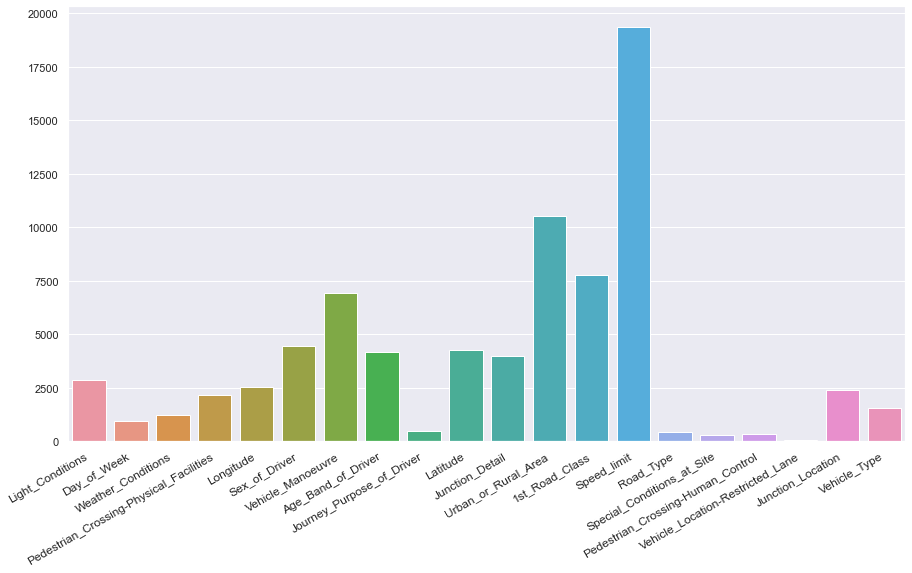

In [1371]:
plt.figure(figsize=(15,8))
sns.barplot(x=selected_attributes, y=selected_attribute_scores)
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='large')
plt.show()

In [1372]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier,AdaBoostClassifier

In [1373]:
from sklearn.tree import DecisionTreeClassifier
import time

In [1374]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train[selected_attributes], y_train)

RandomForestClassifier()

In [1375]:
print("Accuracy on test data is ", rf_classifier.score(X_test[selected_attributes], y_test))

Accuracy on test data is  0.9223670077449262


In [1376]:
Gb_classifier = GradientBoostingClassifier()
Gb_classifier.fit(X_train[selected_attributes],y_train)

GradientBoostingClassifier()

In [1377]:
print("Accuracy on test data is ", Gb_classifier.score(X_test[selected_attributes], y_test))

Accuracy on test data is  0.6827689524563287


In [1378]:
Ada_classifier = AdaBoostClassifier()
Ada_classifier.fit(X_train[selected_attributes],y_train)

AdaBoostClassifier()

In [1103]:
print("Accuracy on test data is ", Ada_classifier.score(X_test[selected_attributes], y_test))

Accuracy on test data is  0.608824693312228


In [1379]:
Dt_classifier = DecisionTreeClassifier()

Dt_classifier.fit(X_train[selected_attributes],y_train)

DecisionTreeClassifier()

In [1380]:
print("Accuracy on test data is ", Dt_classifier.score(X_test[selected_attributes], y_test))

Accuracy on test data is  0.8416954039233422


In [ ]:
## Predict casualty severity and update dataframe with the predicted values

In [1381]:
non_fatal_accidents  = all_dataset[all_dataset['Casualty_Severity']!=1].reset_index(drop=True)

In [1382]:
non_fatal_accidents

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,6.0,1.0,58.0,9.0,1598.0,1.0,3.0,2.0,1.0,2.0
1,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,6.0,1.0,58.0,9.0,1598.0,1.0,3.0,2.0,1.0,2.0
2,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,6.0,1.0,58.0,9.0,1598.0,1.0,3.0,2.0,1.0,2.0
3,2019010152270,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,...,6.0,2.0,24.0,5.0,1598.0,1.0,3.0,3.0,1.0,3.0
4,2019010155191,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,...,1.0,1.0,33.0,6.0,1598.0,1.0,3.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151401,2019984106919,-3.368899,55.047323,98,3,1,1,18/05/2019,7,01:00,...,1.0,1.0,24.0,5.0,1997.0,2.0,14.0,6.0,3.0,6.0
151402,2019984107019,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,...,1.0,1.0,22.0,5.0,2143.0,2.0,1.0,1.0,1.0,1.0
151403,2019984107219,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,...,6.0,1.0,61.0,9.0,2967.0,2.0,5.0,7.0,3.0,7.0
151404,2019984107419,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,...,5.0,1.0,78.0,11.0,1597.0,2.0,6.0,8.0,3.0,8.0


In [1383]:
lookup_data_2019

,Accident_Index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
0,2019010128300,1,2,0.000000,1.000000,1
1,2019010128300,1,1,0.000000,1.000000,1
2,2019010128300,1,3,0.000000,1.000000,1
3,2019010152270,1,1,0.000000,1.000000,1
4,2019010155191,2,1,0.000000,1.000000,1
...,...,...,...,...,...,...
151401,2019984106919,1,1,0.183336,0.816664,0
151402,2019984107019,1,1,0.074588,0.925412,0
151403,2019984107219,2,1,0.048524,0.951476,0
151404,2019984107419,1,1,0.183316,0.816684,0


In [1384]:
predicted_probability = rf_classifier.predict_proba(non_fatal_accidents[selected_attributes])
predicted_probability_list = predicted_probability.tolist()

In [1385]:
non_fatal_accidents.isna().sum()

Accident_Index           0
Longitude                0
Latitude                 0
Police_Force             0
Accident_Severity        0
                        ..
Propulsion_Code          0
Age_of_Vehicle           0
Driver_IMD_Decile        0
Driver_Home_Area_Type    0
Vehicle_IMD_Decile       0
Length: 68, dtype: int64

In [1386]:
for x in range(len(predicted_probability_list)):
    non_fatal_accidents.at[x,'Predicted_Serious']=predicted_probability_list[x][1]
    non_fatal_accidents.at[x,'Predicted_Slight']=predicted_probability_list[x][2]

In [ ]:
#Save non fatal accidents with the predicted probabilities to file

In [1387]:
non_fatal_accidents.to_csv('non_fatal_accidents.csv')

In [ ]:
lookup_data = pd.read_csv('Data/cas_adjustment_lookup_2019.csv')

In [ ]:
#Get only 2019 accident casualty records
lookup_data_2019 = lookup_data[lookup_data['accident_index'].str.startswith('2019')]

In [ ]:
lookup_data_2019.reset_index(drop=True, inplace=True)

In [ ]:
lookup_data_2019.rename(columns={'accident_index' : 'Accident_Index'}, inplace=True)

In [1116]:
lookup_data_2019

,Accident_Index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
0,2019010128300,1,2,0.000000,1.000000,1
1,2019010128300,1,1,0.000000,1.000000,1
2,2019010128300,1,3,0.000000,1.000000,1
3,2019010152270,1,1,0.000000,1.000000,1
4,2019010155191,2,1,0.000000,1.000000,1
...,...,...,...,...,...,...
151401,2019984106919,1,1,0.183336,0.816664,0
151402,2019984107019,1,1,0.074588,0.925412,0
151403,2019984107219,2,1,0.048524,0.951476,0
151404,2019984107419,1,1,0.183316,0.816684,0


In [1128]:
lookup_data_2019[lookup_data_2019.duplicated() == True]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based


In [1117]:
lookup_data_2019.isna().sum()

Accident_Index        0
Vehicle_Reference     0
Casualty_Reference    0
Adjusted_Serious      0
Adjusted_Slight       0
Injury_Based          0
dtype: int64

In [1129]:
non_fatal_accidents.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Month', 'Hour', 'weekdays',
       'Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passen

In [1391]:
accident_casualty_lookup = pd.merge(non_fatal_accidents, lookup_data_2019, how='left',
                                        on=[ 'Accident_Index','Vehicle_Reference','Casualty_Reference'])

In [1388]:
len(non_fatal_accidents)

151406

In [1107]:
len(lookup_data_2019)

151406

In [1392]:
len(accident_casualty_lookup)

151406

### Compute ROC-AUC score and plot graph for both adjusted lookup probabilities (Government Model)and predicted model (RandomForest model)

In [783]:
from sklearn.metrics import roc_curve, roc_auc_score

In [1393]:
accident_casualty_lookup.isna().sum()

Accident_Index       0
Longitude            0
Latitude             0
Police_Force         0
Accident_Severity    0
                    ..
Predicted_Serious    0
Predicted_Slight     0
Adjusted_Serious     0
Adjusted_Slight      0
Injury_Based         0
Length: 73, dtype: int64

In [1394]:
predicted_serious_prob = accident_casualty_lookup['Predicted_Serious'].tolist()
adjusted_serious_prob = accident_casualty_lookup['Adjusted_Serious'].tolist()

In [1396]:
### ROC curve
pred_fpr1, pred_tpr1, thresh1 = roc_curve(accident_casualty_lookup['Casualty_Severity'], predicted_serious_prob, pos_label=2)
pred_fpr2, pred_tpr2, thresh2 = roc_curve(accident_casualty_lookup['Casualty_Severity'], adjusted_serious_prob, pos_label=2)
predicted_auc_score = roc_auc_score(accident_casualty_lookup['Casualty_Severity'], predicted_serious_prob)
adjusted_auc_score = roc_auc_score(accident_casualty_lookup['Casualty_Severity'], adjusted_serious_prob)
print("ROC-AUC Score of Prediction(RandomForest model) is ", predicted_auc_score) 
print(f"ROC-AUC score for the adjusted model is ", adjusted_auc_score)

ROC-AUC Score of Prediction(RandomForest model) is  0.06767227978728035
ROC-AUC score for the adjusted model is  0.0


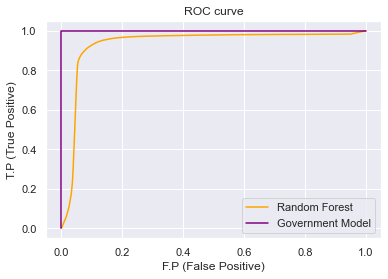

In [1398]:
plt.plot(pred_fpr1, pred_tpr1,color='orange', label='Random Forest')
plt.plot(pred_fpr2, pred_tpr2,color='purple', label='Government Model')
plt.title('ROC curve')
plt.xlabel('F.P (False Positive)')
plt.ylabel('T.P (True Positive)')
plt.legend(loc='best')
plt.savefig('ROC',dpi=200)
plt.show()

In [1399]:
from sklearn.metrics import accuracy_score

In [1402]:
print("Randomforest Train accuracy ",accuracy_score(y_train,rf_classifier.predict(X_train[selected_attributes])))

Rain forest Train accuracy  1.0


In [1407]:
print("RandomForest Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_classifier.predict(X_train[selected_attributes]),
                                                           rownames=['Actual'],colnames=["Predicted"]))


print("RandomForest Test accuracy",accuracy_score(y_test,rf_classifier.predict(X_test[selected_attributes])))

RandomForest Train Confusion Matrix

 Predicted      1      2      3
Actual                        
1          94209      0      0
2              0  94545      0
3              0      0  94268
RandomForest Test accuracy 0.9223670077449262


In [1408]:
print("Decision Tree Train Accuracy ", accuracy_score(y_train,Dt_classifier.predict(X_train[selected_attributes])))

Decision Tree Train Accuracy  1.0


In [1409]:
print("Classifier Train Confusion Matrix\n\n",pd.crosstab(y_train,Dt_classifier.predict(X_train[selected_attributes]),
                                                           rownames=['Actual'],colnames=["Predicted"]))

print("RandomForest Test accuracy",accuracy_score(y_test,Dt_classifier.predict(X_test[selected_attributes])))

Classifier Train Confusion Matrix

 Predicted      1      2      3
Actual                        
1          94209      0      0
2              0  94545      0
3              0      0  94268
RandomForest Test accuracy 0.8416954039233422


In [ ]:
pred_prob1 = accident_casualty_lookup['Slight_Prob'].tolist()
pred_prob2 = accident_casualty_lookup['Adjusted_Slight'].tolist()
### ROC curve
fpr1, tpr1, thresh1 = roc_curve(accident_casualty_lookup['Casualty_Severity'], pred_prob1, pos_label=3)
fpr2, tpr2, thresh2 = roc_curve(accident_casualty_lookup['Casualty_Severity'], pred_prob2, pos_label=3)
auc_score1 = roc_auc_score(accident_casualty_lookup['Casualty_Severity'], pred_prob1)
auc_score2 = roc_auc_score(accident_casualty_lookup['Casualty_Severity'], pred_prob2)
print("ROC-AUC Score of Prediction severity is ", auc_score1, " and score of adjustment file is ", auc_score2)

In [802]:
slight_and_serious_casualties = all_dataset[all_dataset['Casualty_Severity']!=1].reset_index(drop=True)
prediction = rf_classifier.predict_proba(slight_and_serious_casualties[selected_attributes])
prediction_list = prediction.tolist()

In [803]:
for k in range(len(prediction_list)):
    slight_and_serious_casualties.at[k, 'Serious_Prob'] = prediction_list[k][1]
    slight_and_serious_casualties.at[k, 'Slight_Prob'] = prediction_list[k][2]

In [808]:
lookup_df = pd.read_csv('Original Data/cas_adjustment_lookup_2019.csv')
lookup_2019_df = lookup_df[lookup_df['accident_index'].str.startswith('2019')]
lookup_2019_df.reset_index(drop=True, inplace=True)
lookup_2019_df.rename(columns={'accident_index' : 'Accident_Index'}, inplace=True)

In [809]:
acc_cas_lookup_df = pd.merge(slight_and_serious_casualties, lookup_2019_df, how='left',
                                        on=[ 'Casualty_Reference', 'Accident_Index', 'Vehicle_Reference'])

In [810]:
acc_cas_lookup_df.isna().sum()

Accident_Index           0
Longitude                0
Latitude                 0
Police_Force             0
Accident_Severity        0
                     ...  
Serious_Prob             0
Slight_Prob              0
Adjusted_Serious     28171
Adjusted_Slight      28171
Injury_Based         28171
Length: 73, dtype: int64